## Base Configurations

In [1]:
#import pymongo
import pandas as pd
#from pymongo import MongoClient
from random import random
import json

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Setting the aesthetics for the plots
sns.set(style="whitegrid")


In [2]:
pd.reset_option('^display.',silent=True)

## Read Data

In [3]:
# Read data from your Mongo DB
# df_individual
# df_household

# CSV File Path
# If you have problems with Mongo DB installations, you can continue via csv files. But remember, it will affect your points.
file_individual = 'WLD_2023_SYNTH-SVY-IND-EN_v01_M.csv'
file_household = 'WLD_2023_SYNTH-SVY-HLD-EN_v01_M.csv'
# Read Files
df_individual = pd.read_csv(file_individual, encoding='utf-8')
df_household = pd.read_csv(file_household, encoding='utf-8')

# Data Info
df_individual.info(), df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32396 entries, 0 to 32395
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hid             32396 non-null  object 
 1   idno            32396 non-null  int64  
 2   relation        32396 non-null  int64  
 3   sex             32396 non-null  int64  
 4   age             32396 non-null  int64  
 5   age_month       3165 non-null   float64
 6   marstat         32396 non-null  int64  
 7   religion        32396 non-null  int64  
 8   school_attend   32396 non-null  int64  
 9   educ_attain     32396 non-null  int64  
 10  yrs_school      29854 non-null  float64
 11  literacy        32396 non-null  int64  
 12  act_status      32396 non-null  int64  
 13  labor_force     32396 non-null  int64  
 14  occupation      32396 non-null  int64  
 15  industry        32396 non-null  int64  
 16  migrate_recent  32396 non-null  int64  
 17  disability      32396 non-null 

(None, None)

In [4]:
df_individual.describe()

,idno,relation,sex,age,age_month,marstat,religion,school_attend,educ_attain,yrs_school,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
count,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,32396.000000,32396.000000,32396.000000,32396.000000,29854.000000,...,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,3165.000000,11623.000000,7715.000000,11320.000000,32396.000000
mean,3.087511,2.474225,1.505309,28.136190,30.359558,1.591987,5.772565,2.404741,1.460828,4.637134,...,0.039110,0.026238,0.008767,0.007810,11.933210,86.185972,2.293728,3.114712,0.047968,310.975034
std,2.047521,1.029515,0.499980,20.137273,17.293287,0.721442,1.063478,1.151001,0.892722,4.942147,...,0.193859,0.159844,0.093220,0.088028,2.898169,12.650298,2.669148,2.194210,0.214534,70.741693
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.770000,48.400000,0.000000,0.000000,0.000000,156.667553
25%,2.000000,2.000000,1.000000,12.000000,15.000000,1.000000,6.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.760000,77.700000,0.000000,1.000000,0.000000,264.084412
50%,3.000000,3.000000,2.000000,24.000000,31.000000,1.000000,6.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,12.340000,89.500000,2.000000,2.000000,0.000000,302.684327
75%,4.000000,3.000000,2.000000,42.000000,45.000000,2.000000,6.000000,3.000000,2.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,14.380000,96.400000,3.000000,4.000000,0.000000,350.174292
max,22.000000,5.000000,2.000000,100.000000,59.000000,4.000000,7.000000,4.000000,4.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,18.590000,108.800000,18.000000,15.000000,2.000000,552.230851


## Exploratory Data Analysis

You can analyze following steps;

* Identify Categorical and Numerical Columns
* Calculate Basic Statistics(mean, standard deviation, minimum, and maximum values)
* Examine Missing Data
* Examine Categoric and Numeric Variables
* Data Visualization
* Correlation Analysis
* Identifiying Outliers



 ### Identify Categorical and Numerical Columns

In this function, featurettes can be categorized according to their type or categorized if they have a unique value within the given threshold limits.


In [5]:
def grab_col_names(dataframe):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 20 and dataframe[col].dtypes in ["int64", "float64"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


grab_col_names(df_individual)

Observations: 32396
Variables: 27
cat_cols: 20
num_cols: 6
cat_but_car: 1
num_but_cat: 20


(['relation',
  'sex',
  'marstat',
  'religion',
  'school_attend',
  'educ_attain',
  'yrs_school',
  'literacy',
  'act_status',
  'labor_force',
  'occupation',
  'industry',
  'migrate_recent',
  'disability',
  'blind',
  'deaf',
  'mental',
  'children_born',
  'children_surv',
  'births_12m'],
 ['idno', 'age', 'age_month', 'ch_weight', 'ch_height', 'hhweight'],
 ['hid'])

In [6]:
grab_col_names(df_household)

Observations: 8000
Variables: 49
cat_cols: 28
num_cols: 20
cat_but_car: 1
num_but_cat: 28


(['geo1',
  'urbrur',
  'hhsize',
  'statocc',
  'rooms',
  'bedrooms',
  'floor',
  'walls',
  'roof',
  'water',
  'piped_water',
  'toilet',
  'flush_toilet',
  'electricity',
  'cook_fuel',
  'phone',
  'cell',
  'car',
  'bicycle',
  'motorcycle',
  'refrigerator',
  'tv',
  'radio',
  'bank',
  'deaths_12m',
  'quint_nat',
  'quint_urb',
  'quint_rur'],
 ['geo2',
  'ea',
  'exp_01',
  'exp_02',
  'exp_03',
  'exp_04',
  'exp_05',
  'exp_06',
  'exp_07',
  'exp_08',
  'exp_09',
  'exp_10',
  'exp_11',
  'exp_12',
  'tot_exp',
  'tot_food',
  'share_food',
  'pc_exp',
  'hhweight',
  'popweight'],
 ['hid'])

### Calculate Basic Statistics(mean, standard deviation, minimum, and maximum values)

In [7]:
df_individual.describe().T

,count,mean,std,min,25%,50%,75%,max
idno,32396.0,3.087511,2.047521,1.000000,2.000000,3.000000,4.000000,22.000000
relation,32396.0,2.474225,1.029515,1.000000,2.000000,3.000000,3.000000,5.000000
sex,32396.0,1.505309,0.499980,1.000000,1.000000,2.000000,2.000000,2.000000
age,32396.0,28.136190,20.137273,0.000000,12.000000,24.000000,42.000000,100.000000
age_month,3165.0,30.359558,17.293287,0.000000,15.000000,31.000000,45.000000,59.000000
marstat,32396.0,1.591987,0.721442,1.000000,1.000000,1.000000,2.000000,4.000000
religion,32396.0,5.772565,1.063478,1.000000,6.000000,6.000000,6.000000,7.000000
school_attend,32396.0,2.404741,1.151001,1.000000,1.000000,3.000000,3.000000,4.000000
educ_attain,32396.0,1.460828,0.892722,0.000000,1.000000,1.000000,2.000000,4.000000
yrs_school,29854.0,4.637134,4.942147,0.000000,0.000000,3.000000,8.000000,18.000000


In [8]:
df_household.describe().T

,count,mean,std,min,25%,50%,75%,max
geo1,8000.0,5.181250,3.034106,1.000000,3.000000,5.000000,8.000000,10.000000
geo2,8000.0,55.675000,30.726615,11.000000,31.000000,51.500000,83.000000,109.000000
ea,8000.0,55737.375000,30722.827585,11003.000000,31071.750000,51511.500000,83095.250000,109046.000000
urbrur,8000.0,1.556250,0.496857,1.000000,1.000000,2.000000,2.000000,2.000000
hhsize,8000.0,4.049500,2.135034,1.000000,3.000000,4.000000,5.000000,22.000000
statocc,8000.0,1.325625,0.646255,1.000000,1.000000,1.000000,1.000000,3.000000
rooms,8000.0,2.812750,1.650614,1.000000,2.000000,3.000000,4.000000,20.000000
bedrooms,8000.0,1.682250,0.892824,0.000000,1.000000,2.000000,2.000000,13.000000
floor,8000.0,2.413000,1.671161,1.000000,1.000000,2.000000,2.000000,6.000000
walls,8000.0,3.324500,1.169346,1.000000,3.000000,3.000000,3.000000,8.000000


### Examine Missing Data

The function below shows the number and rate of missing values.

In [9]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    #if na_name:
        #return na_columns

missing_values_table(df_individual, True)

               n_miss  ratio
age_month       29231  90.23
ch_weight       29231  90.23
ch_height       29231  90.23
children_surv   24681  76.19
births_12m      21076  65.06
children_born   20773  64.12
yrs_school       2542   7.85


In [10]:
missing_values_table(df_household, True)

            n_miss  ratio
quint_rur     4450  55.62
quint_urb     3550  44.38
deaths_12m      78   0.98


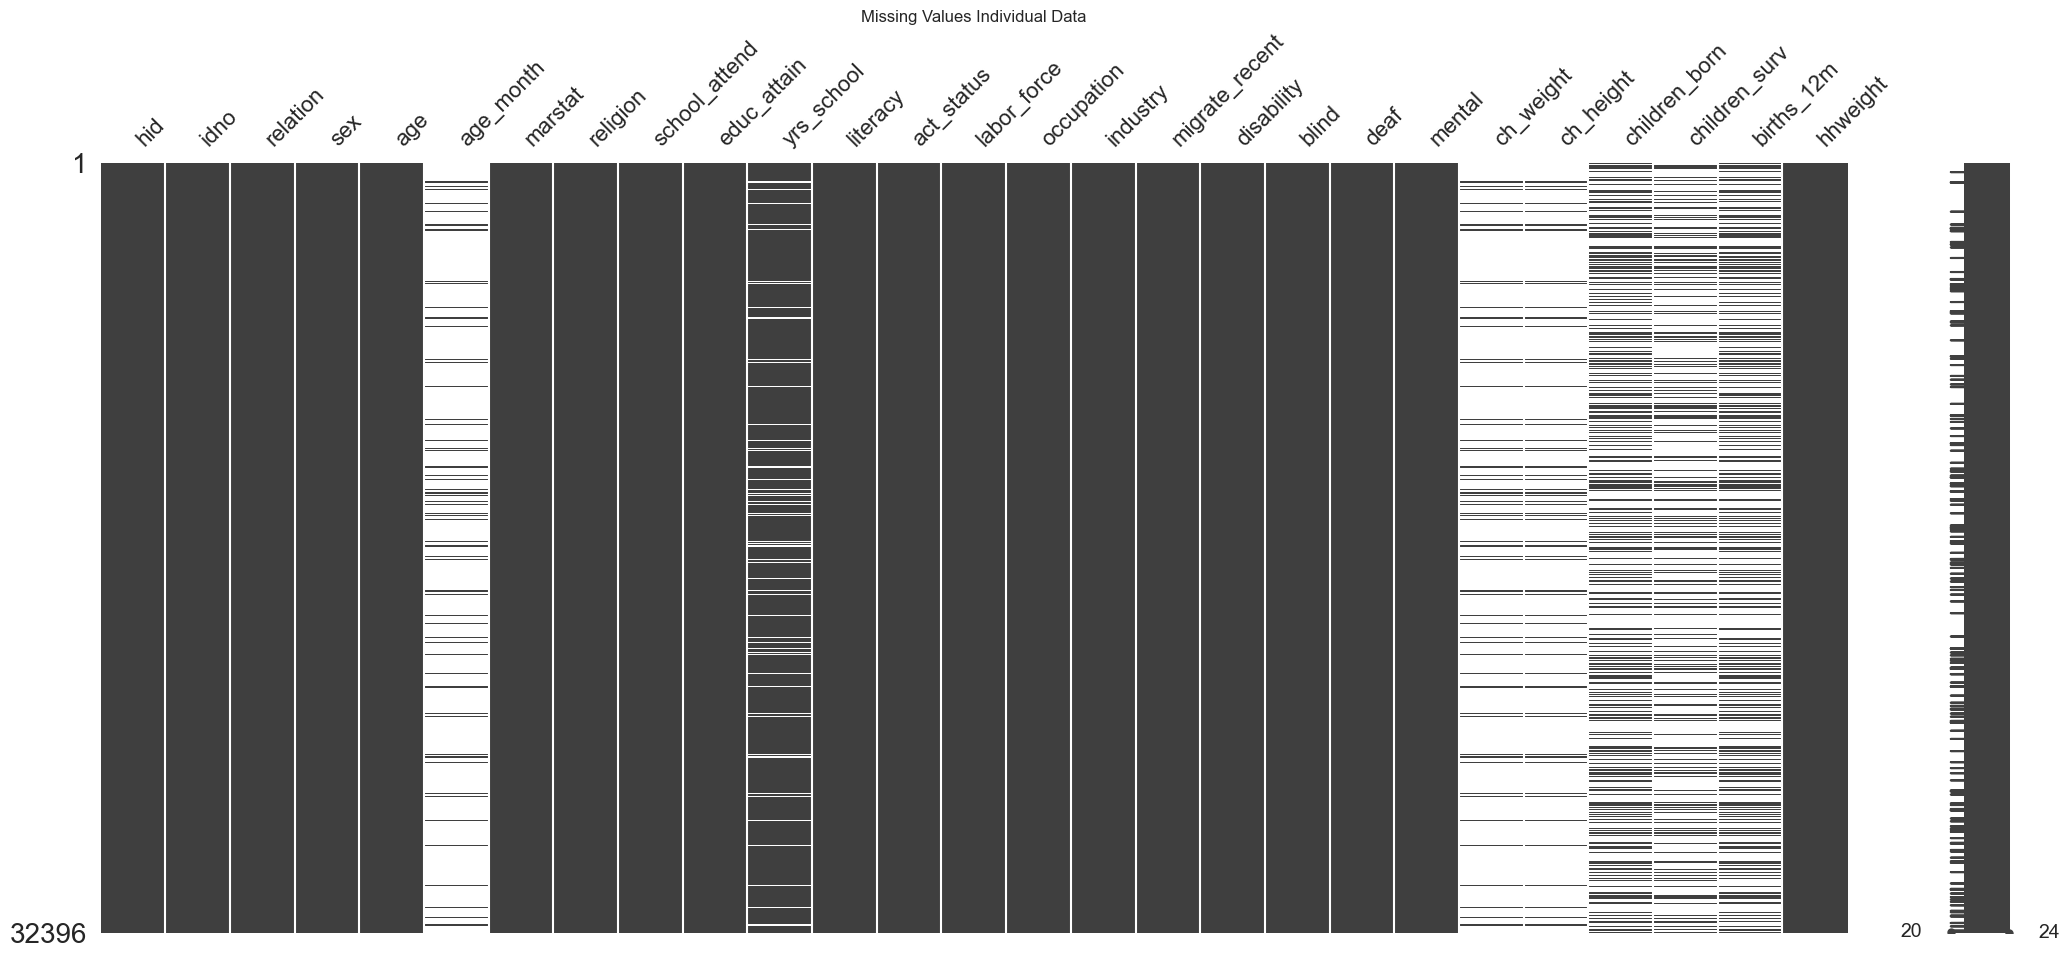

In [11]:
msno.matrix(df_individual)
plt.title("Missing Values Individual Data")
plt.show()

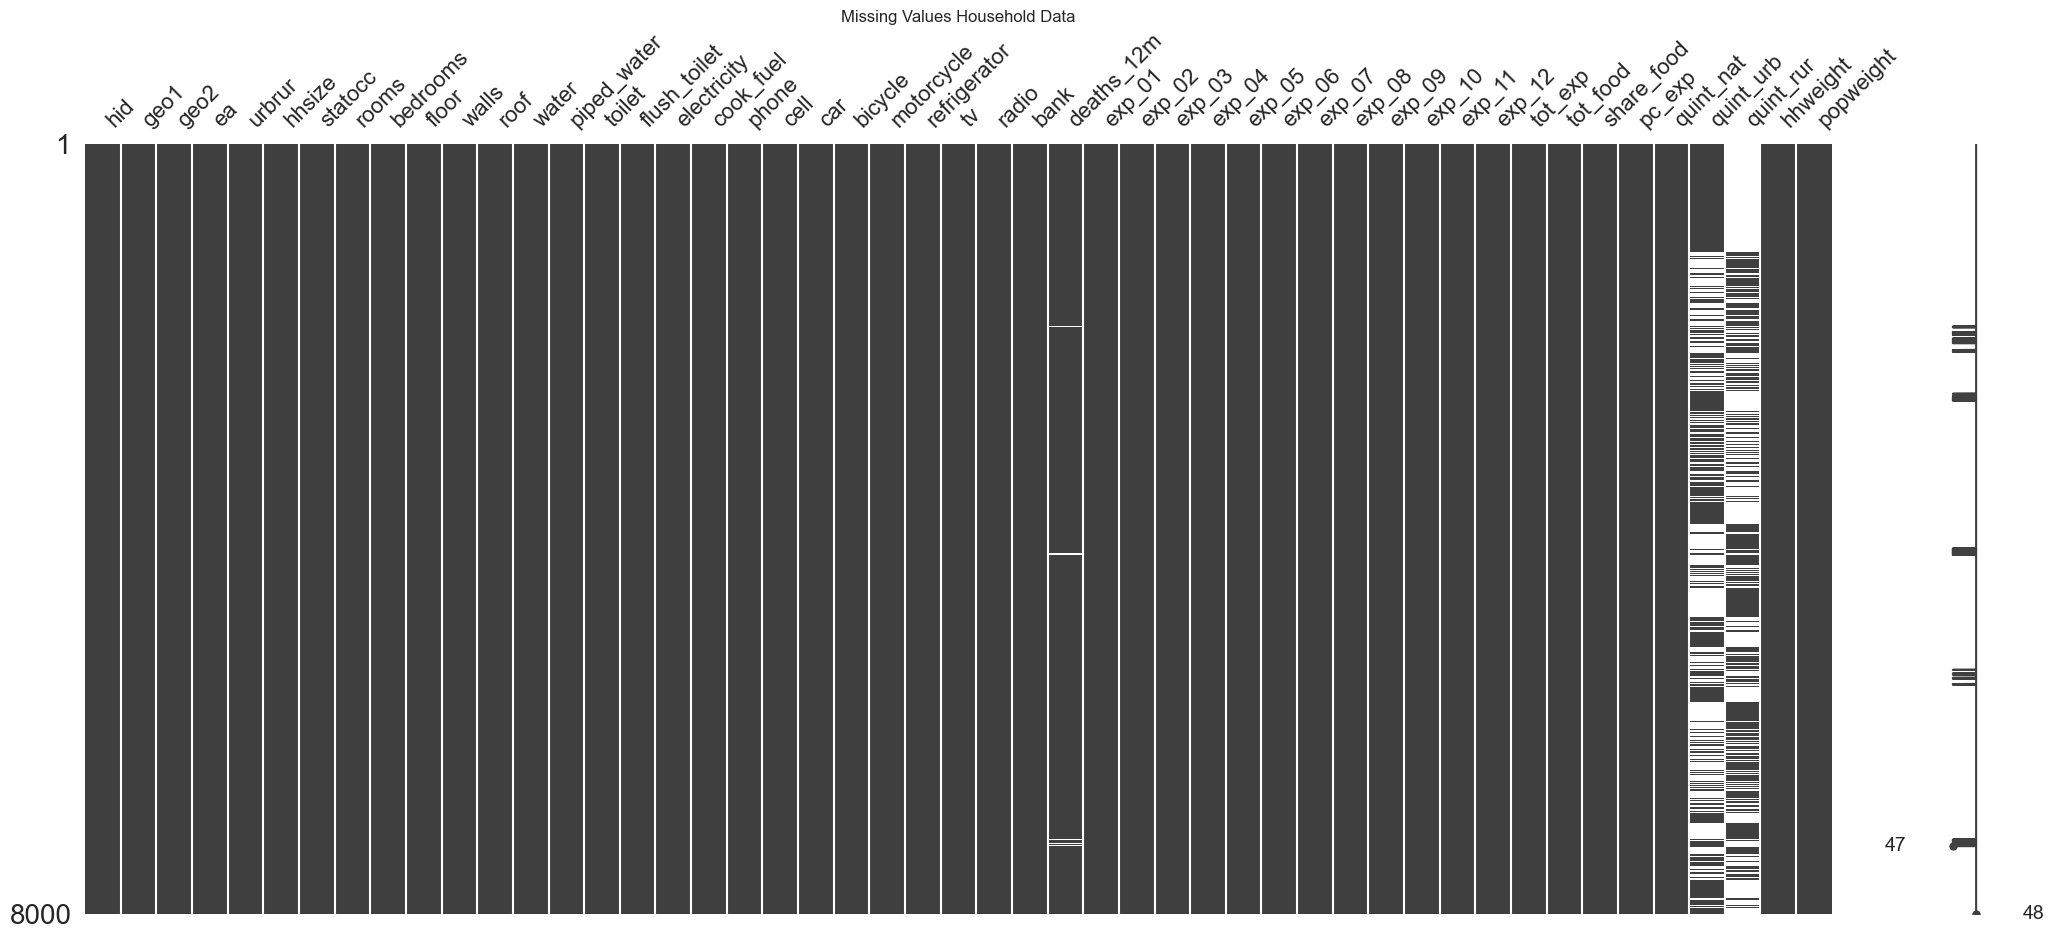

In [12]:
msno.matrix(df_household)
plt.title("Missing Values Household Data")
plt.show()

**'age_month', 'ch_weight', 'ch_height'** features represent the characteristics of the children in the data. Therefore, the same rows in these columns create missing values. In the following sections, these columns can be deleted and new columns representing their information can be added.

### Examine Categoric and Numeric Variables

In [13]:
#grab_col_names function to search for 'HLD' columns

cat_hld,num_hld,car_hld=grab_col_names(df_household)

Observations: 8000
Variables: 49
cat_cols: 28
num_cols: 20
cat_but_car: 1
num_but_cat: 28


In [14]:
#grab_col_names function to search for 'IND' columns

cat_ind,num_ind,car_ind=grab_col_names(df_individual)

Observations: 32396
Variables: 27
cat_cols: 20
num_cols: 6
cat_but_car: 1
num_but_cat: 20


The graphs below show the graphs drawn according to the values of categorical features.

Frequency of categories for relation:
3    14047
1     8000
2     5848
4     4187
5      314
Name: relation, dtype: int64


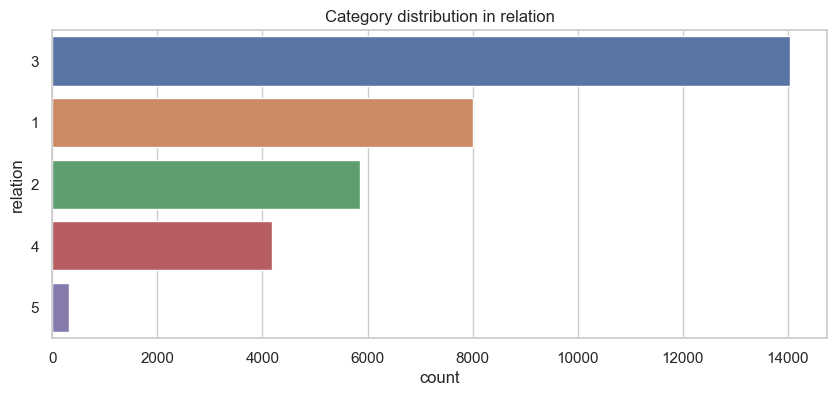

Frequency of categories for sex:
2    16370
1    16026
Name: sex, dtype: int64


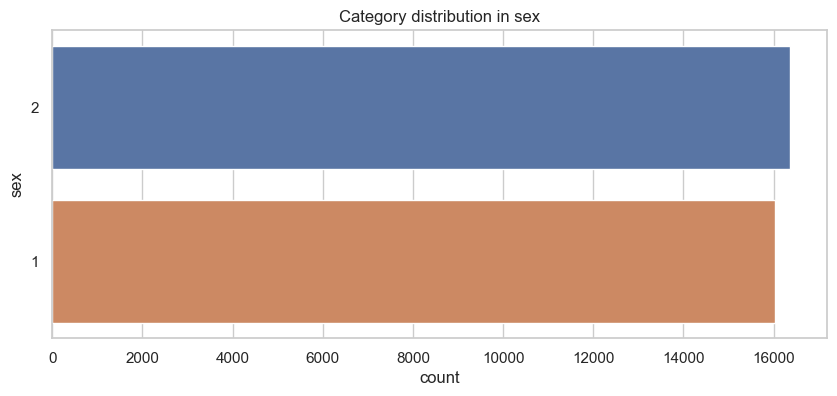

Frequency of categories for marstat:
1    16522
2    13784
4     1214
3      876
Name: marstat, dtype: int64


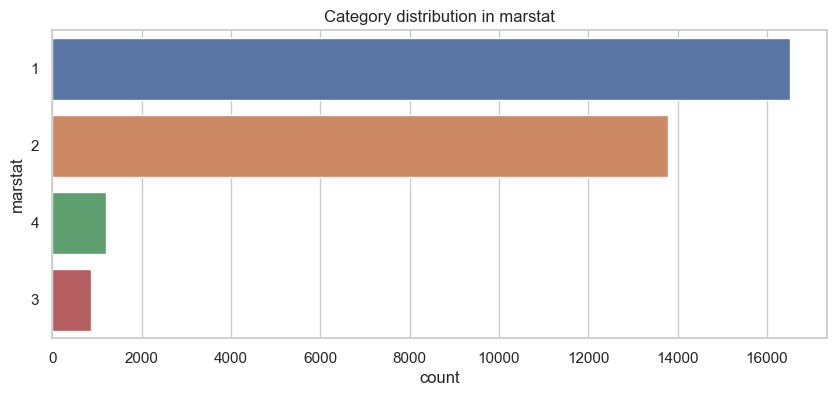

Frequency of categories for religion:
6    29551
1     1445
7      711
5      628
2       43
3       18
Name: religion, dtype: int64


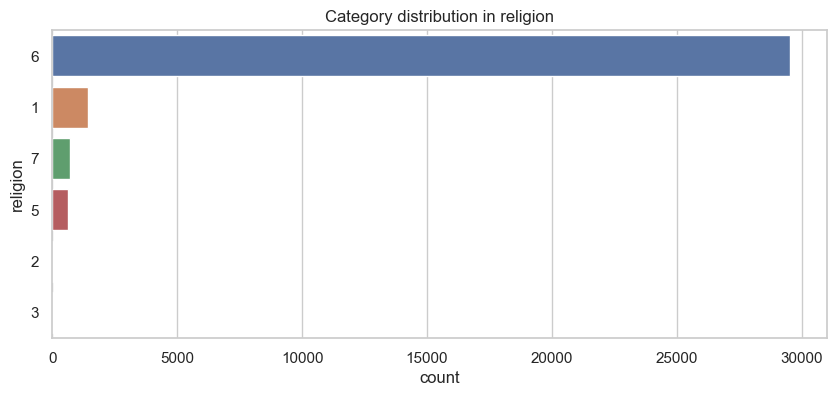

Frequency of categories for school_attend:
1    10685
3    10055
4     6871
2     4785
Name: school_attend, dtype: int64


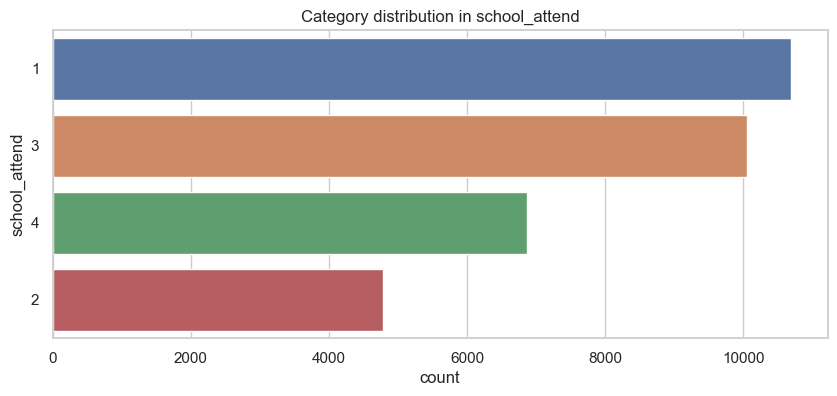

Frequency of categories for educ_attain:
1    17989
2     7439
3     3542
0     2468
4      958
Name: educ_attain, dtype: int64


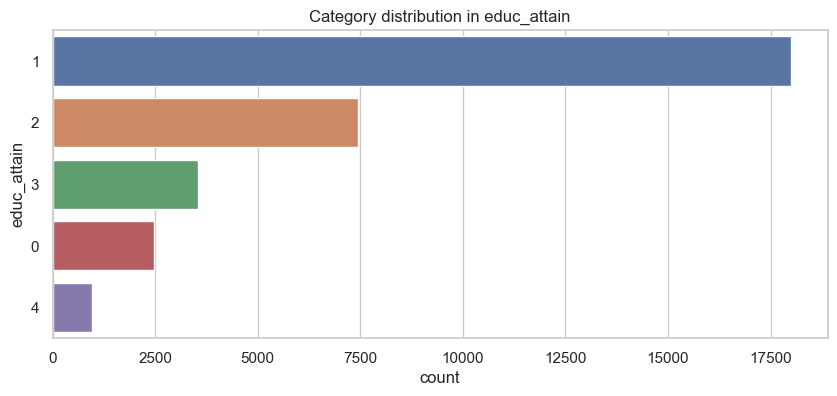

Frequency of categories for yrs_school:
0.0     11314
9.0      1803
8.0      1583
6.0      1553
4.0      1525
3.0      1430
1.0      1367
12.0     1363
7.0      1343
2.0      1204
5.0      1152
10.0      973
11.0      884
13.0      863
16.0      443
14.0      282
15.0      276
18.0      265
17.0      231
Name: yrs_school, dtype: int64


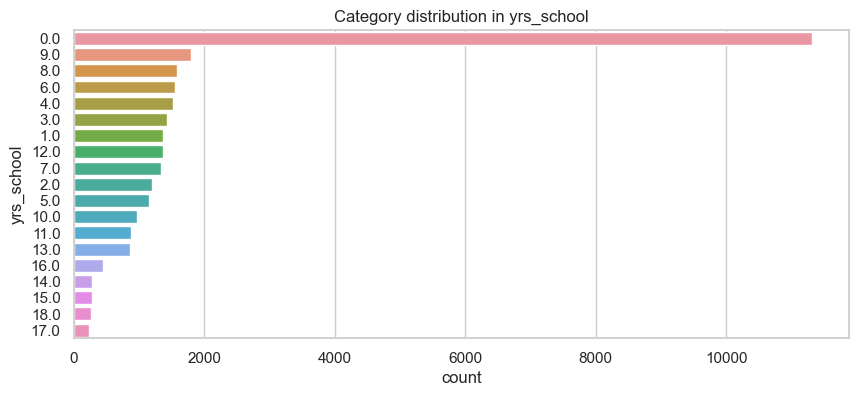

Frequency of categories for literacy:
1    24055
2     5176
0     3165
Name: literacy, dtype: int64


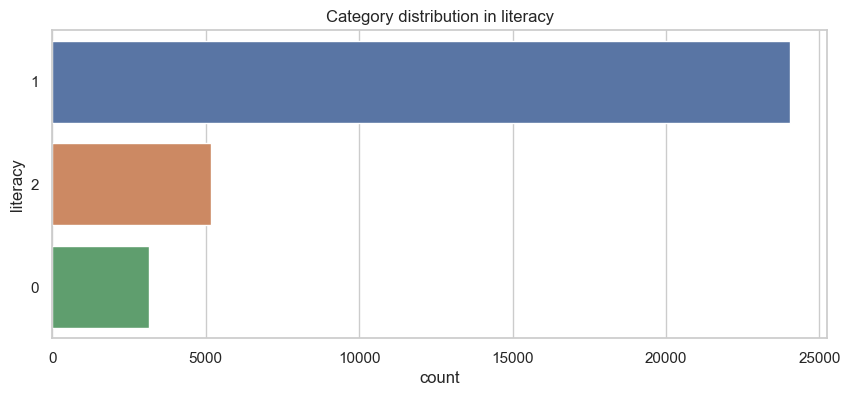

Frequency of categories for act_status:
1    13262
3    11528
0     6830
2      776
Name: act_status, dtype: int64


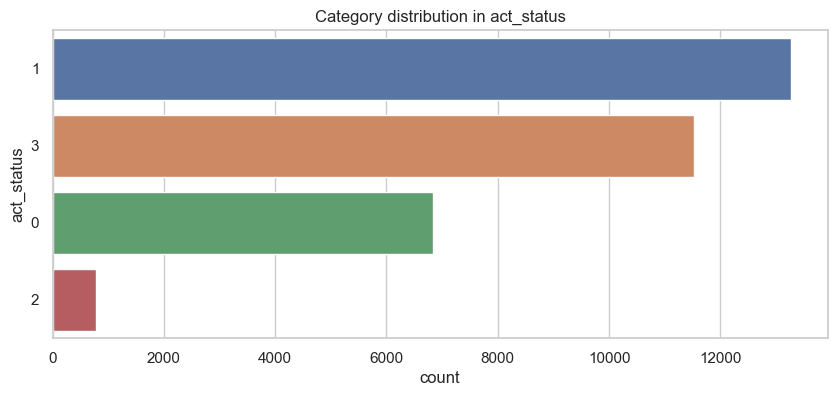

Frequency of categories for labor_force:
1    13726
0    10138
2     8532
Name: labor_force, dtype: int64


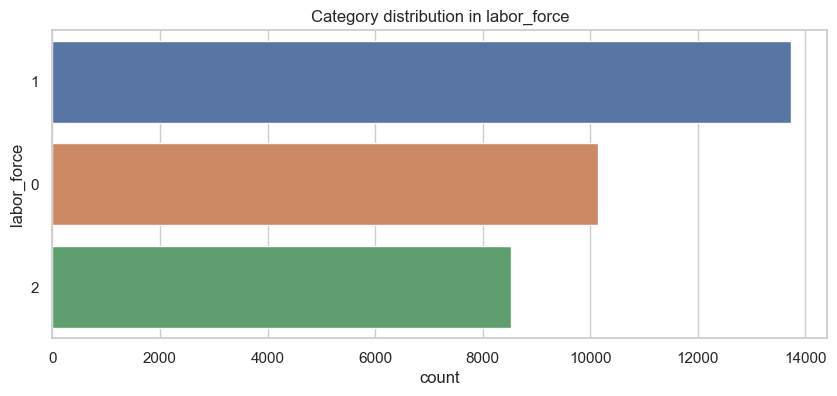

Frequency of categories for occupation:
0     19439
6      4021
5      1989
7      1897
9      1718
2       803
8       792
4       643
3       627
1       355
11       67
10       45
Name: occupation, dtype: int64


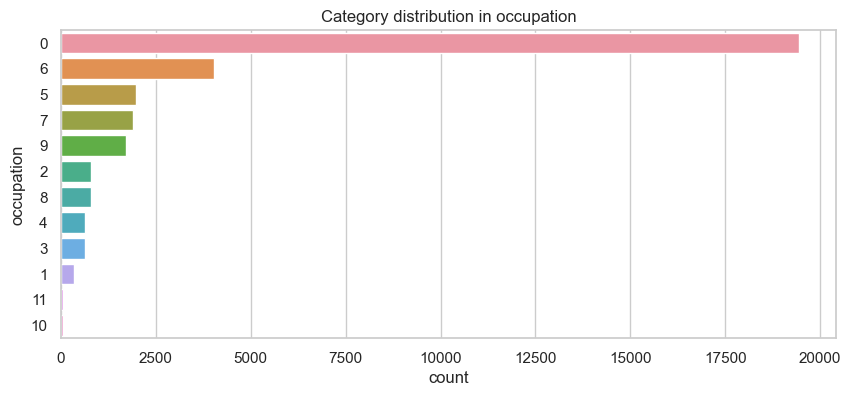

Frequency of categories for industry:
0     19514
1      4501
6      1732
3      1309
5       941
12      635
8       629
15      623
11      603
7       449
14      447
10      404
13      294
9       141
2       101
4        73
Name: industry, dtype: int64


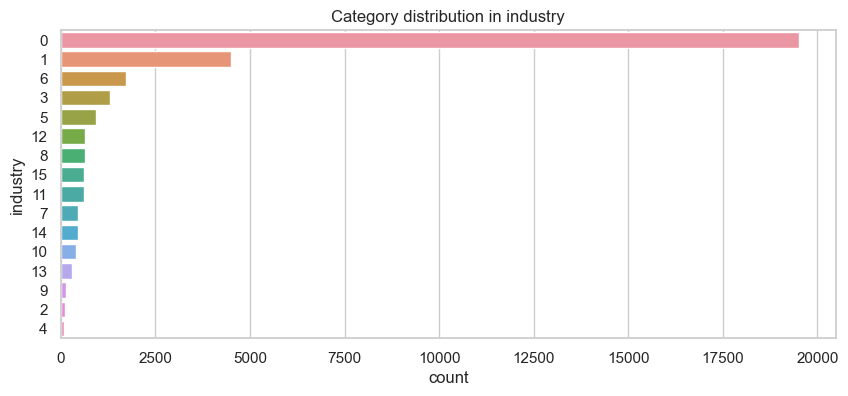

Frequency of categories for migrate_recent:
20    8152
99    6358
11    5569
12    4172
30    3165
10    2881
0     2099
Name: migrate_recent, dtype: int64


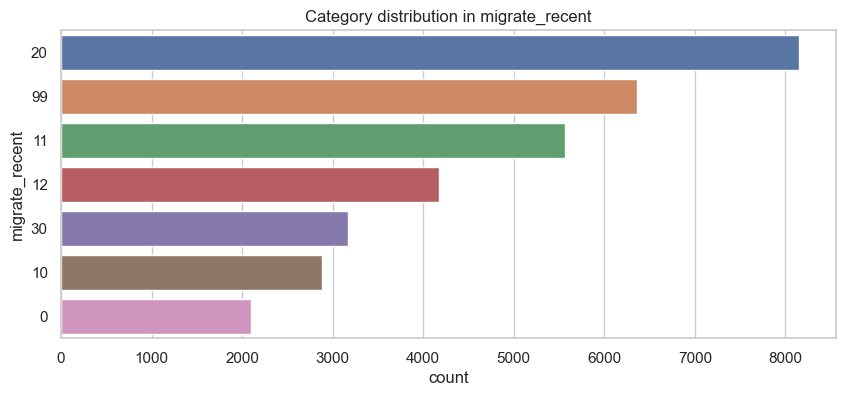

Frequency of categories for disability:
0    31129
1     1267
Name: disability, dtype: int64


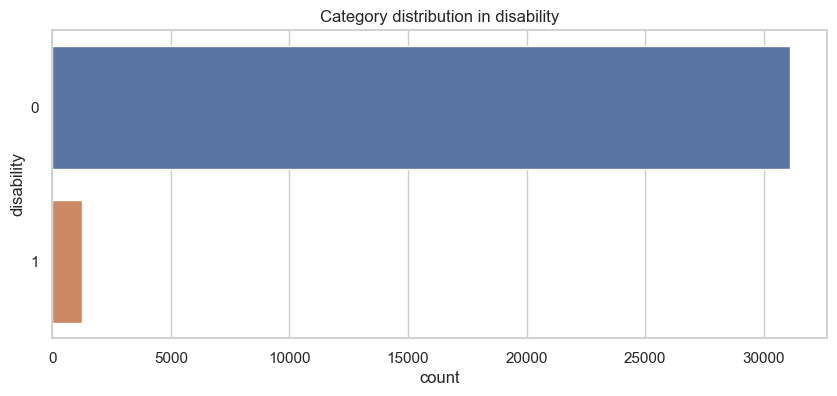

Frequency of categories for blind:
0    31546
1      850
Name: blind, dtype: int64


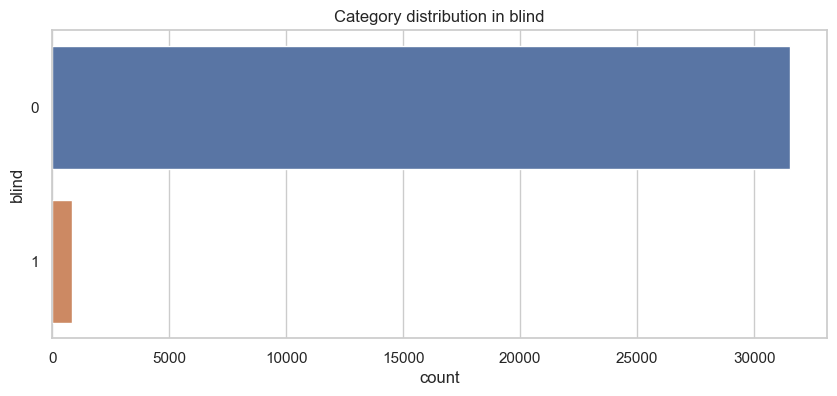

Frequency of categories for deaf:
0    32112
1      284
Name: deaf, dtype: int64


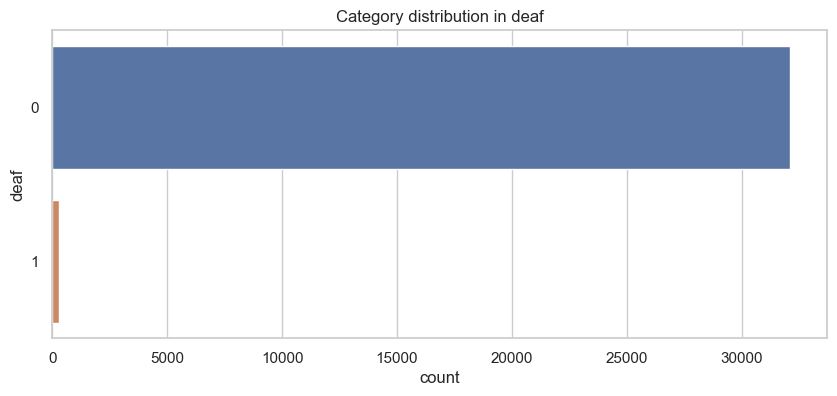

Frequency of categories for mental:
0    32143
1      253
Name: mental, dtype: int64


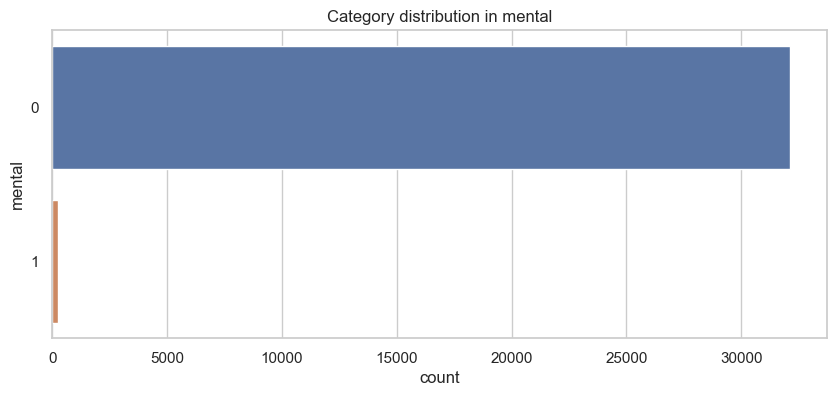

Frequency of categories for children_born:
0.0     3908
2.0     1875
1.0     1793
3.0     1270
4.0      863
5.0      528
6.0      360
7.0      277
8.0      273
9.0      162
10.0     156
11.0      67
12.0      47
13.0      25
15.0       8
14.0       6
16.0       3
18.0       2
Name: children_born, dtype: int64


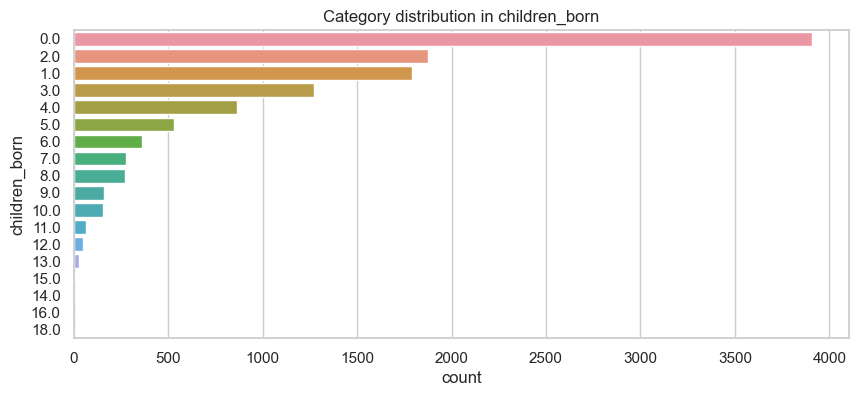

Frequency of categories for children_surv:
2.0     1917
1.0     1903
3.0     1342
4.0      867
5.0      573
6.0      383
7.0      235
8.0      217
9.0      101
10.0      64
0.0       53
11.0      31
12.0      19
14.0       5
13.0       4
15.0       1
Name: children_surv, dtype: int64


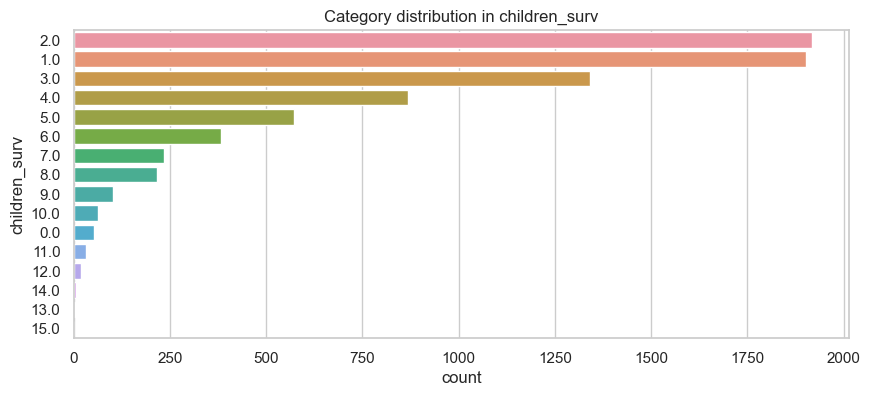

Frequency of categories for births_12m:
0.0    10779
1.0      539
2.0        2
Name: births_12m, dtype: int64


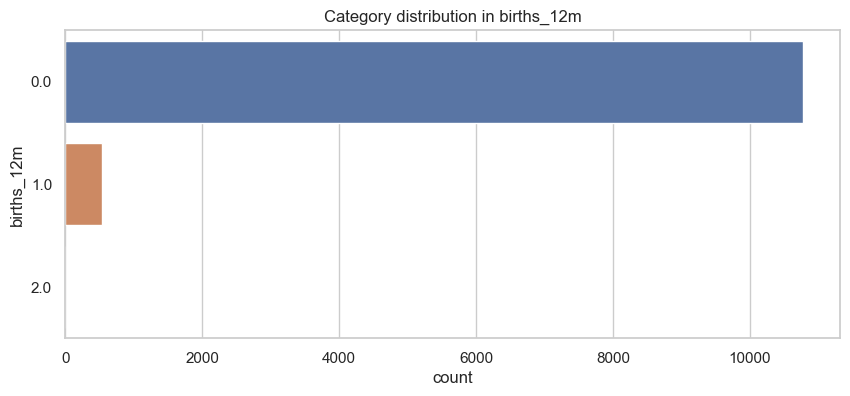

Frequency of categories for geo1:
4     1175
1     1125
10     950
9      925
3      900
2      750
5      675
6      600
7      575
8      325
Name: geo1, dtype: int64


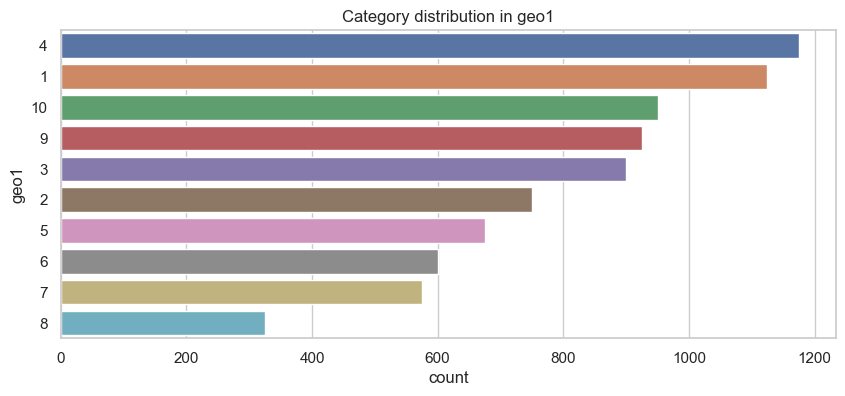

Frequency of categories for urbrur:
2    4450
1    3550
Name: urbrur, dtype: int64


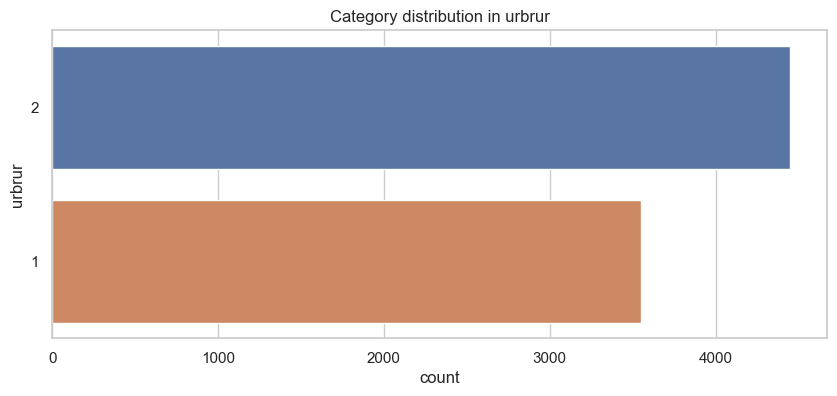

Frequency of categories for hhsize:
4     1727
3     1577
5     1202
2     1174
1      727
6      648
7      414
8      267
9      109
10      72
11      35
12      17
15      10
13       9
14       5
17       3
16       2
18       1
22       1
Name: hhsize, dtype: int64


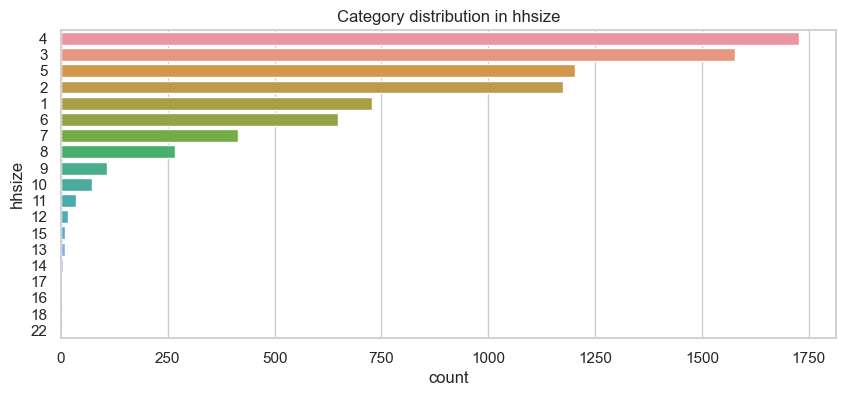

Frequency of categories for statocc:
1    6187
2    1021
3     792
Name: statocc, dtype: int64


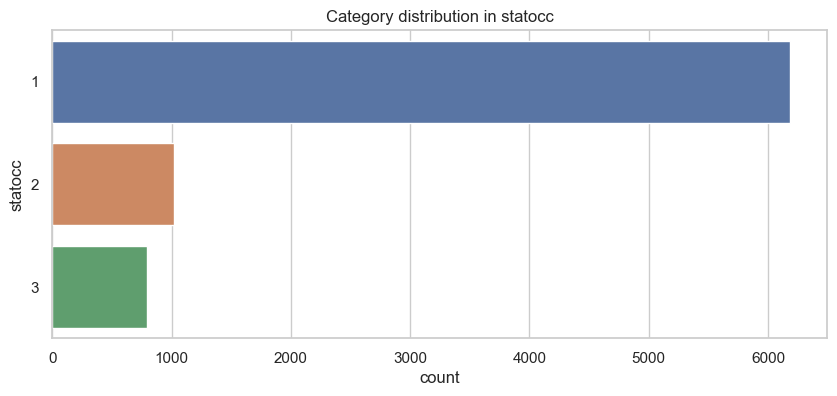

Frequency of categories for rooms:
2     1950
3     1925
1     1853
4     1266
5      591
6      225
7      102
8       42
9       12
11      11
10       8
20       5
12       3
15       2
13       1
16       1
14       1
19       1
18       1
Name: rooms, dtype: int64


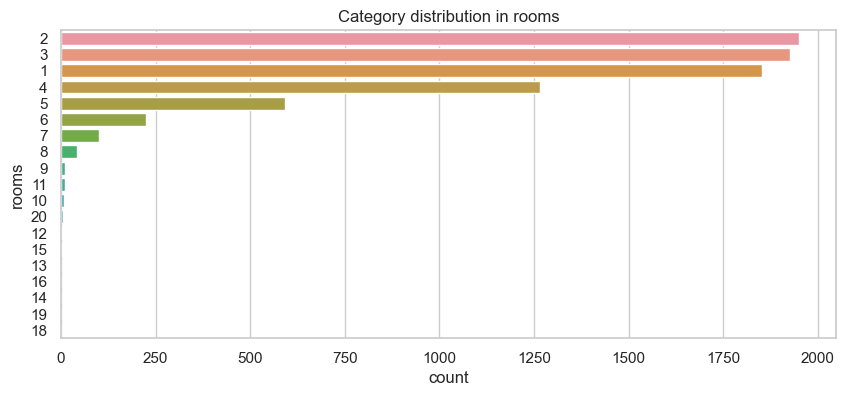

Frequency of categories for bedrooms:
1     3774
2     2657
3     1113
0      216
4      191
5       39
6        7
8        1
9        1
13       1
Name: bedrooms, dtype: int64


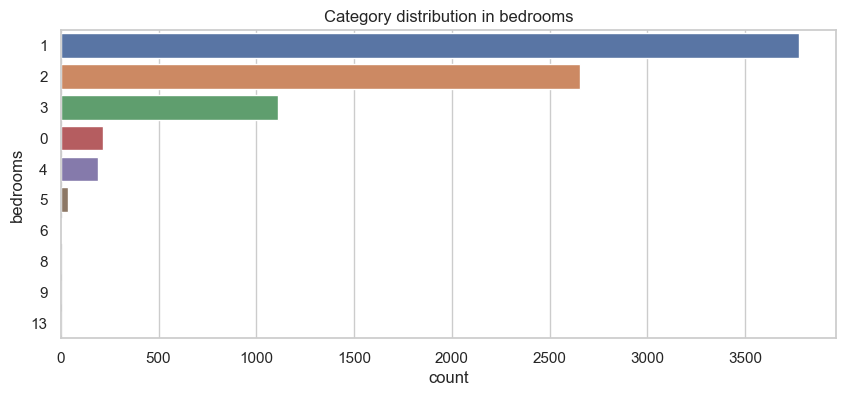

Frequency of categories for floor:
2    4502
1    2121
6    1338
3      22
5      17
Name: floor, dtype: int64


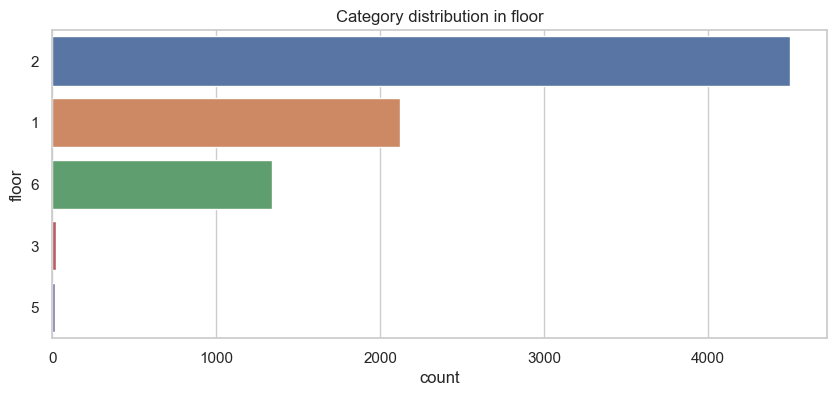

Frequency of categories for walls:
3    5380
5     985
2     900
4     270
7     148
8     124
1     107
6      86
Name: walls, dtype: int64


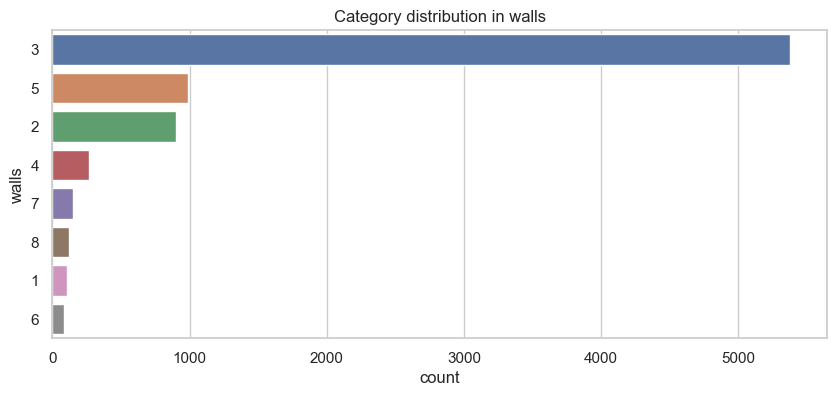

Frequency of categories for roof:
1    3481
5    3039
7     615
9     376
8     169
6     155
4     144
2      13
3       8
Name: roof, dtype: int64


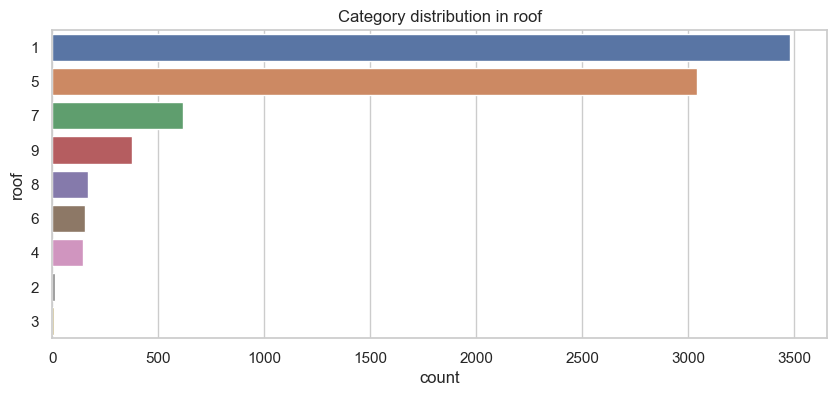

Frequency of categories for water:
11    4452
21    1248
43     616
32     349
71     278
61     181
51     175
12     154
96     134
14     122
42      94
41      71
62      59
31      55
13      12
Name: water, dtype: int64


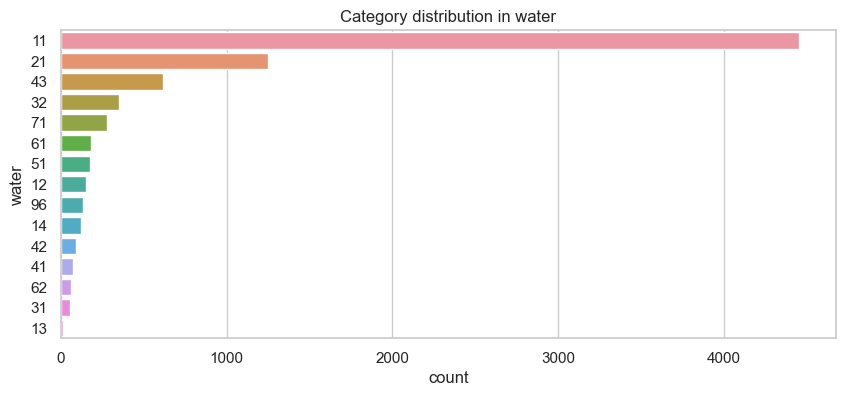

Frequency of categories for piped_water:
1    4452
0    3260
2     154
3     134
Name: piped_water, dtype: int64


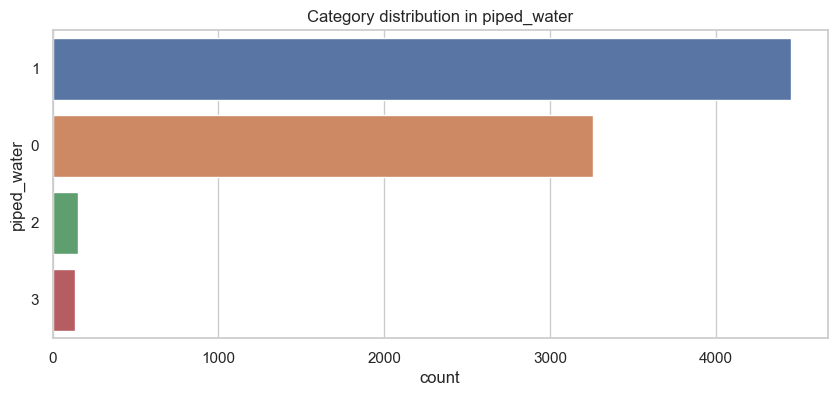

Frequency of categories for toilet:
11    2936
31    1669
21    1356
22     656
12     422
23     344
13     322
96     246
14      49
Name: toilet, dtype: int64


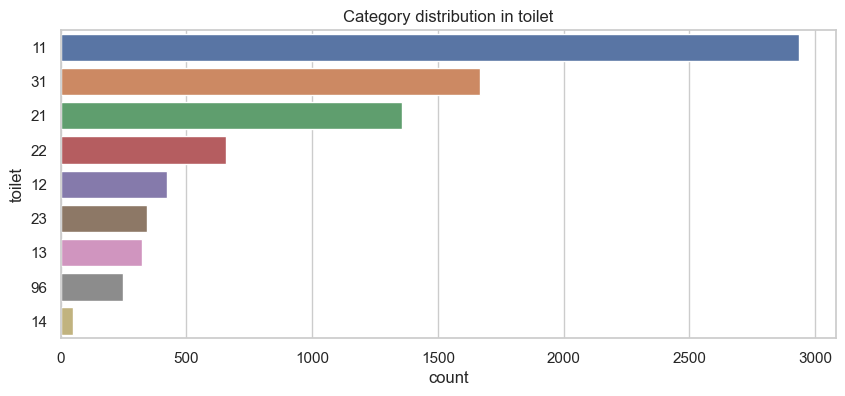

Frequency of categories for flush_toilet:
1    3729
2    2602
0    1669
Name: flush_toilet, dtype: int64


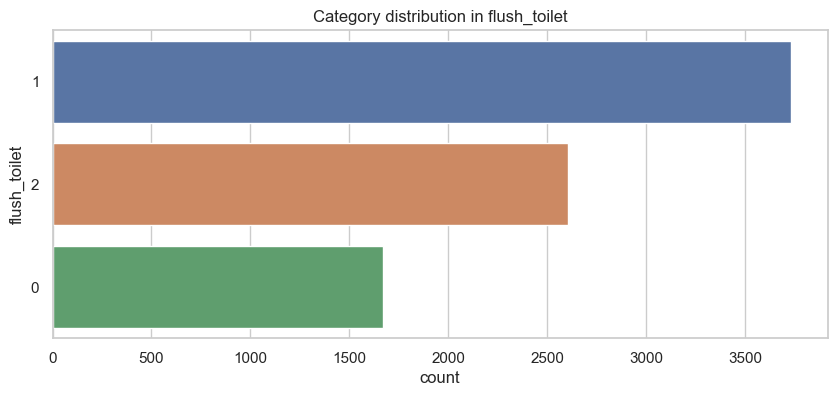

Frequency of categories for electricity:
1    6648
0    1352
Name: electricity, dtype: int64


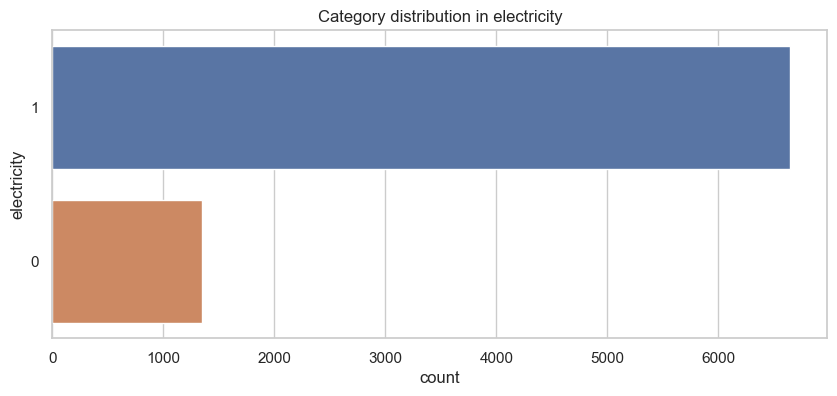

Frequency of categories for cook_fuel:
2    4255
4    2388
5     442
3     345
1     302
6     268
Name: cook_fuel, dtype: int64


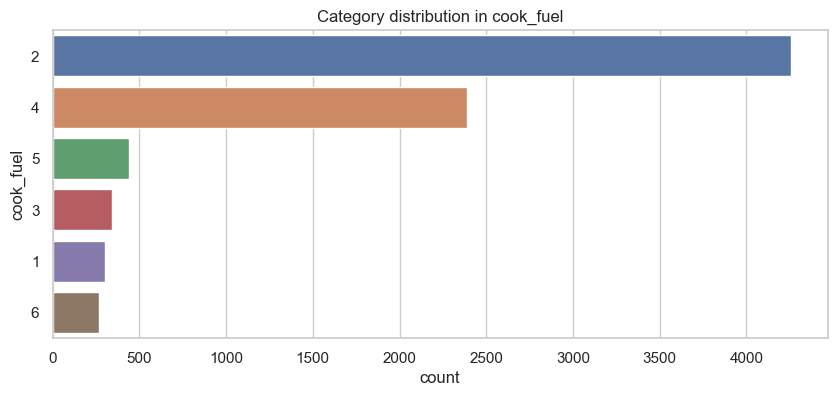

Frequency of categories for phone:
0    6200
1    1800
Name: phone, dtype: int64


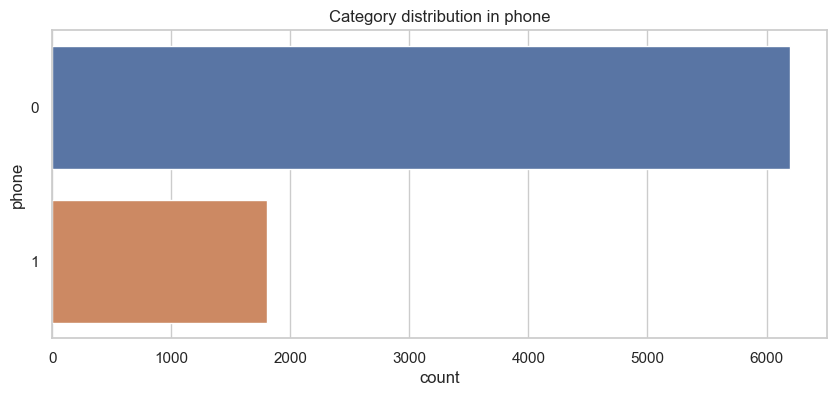

Frequency of categories for cell:
1    5049
0    2951
Name: cell, dtype: int64


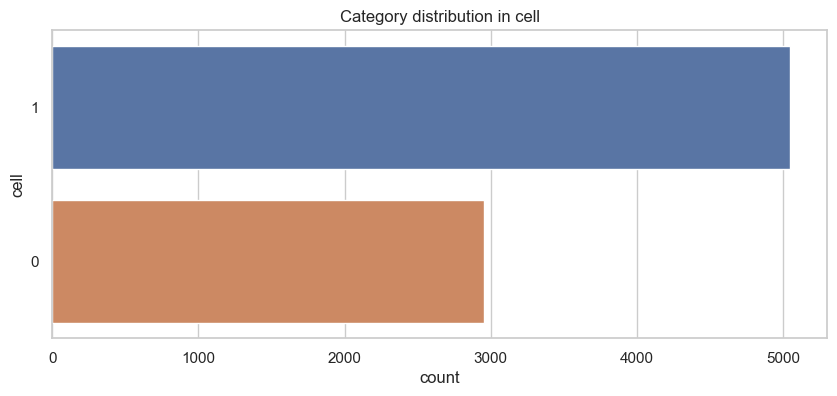

Frequency of categories for car:
0    6039
1    1961
Name: car, dtype: int64


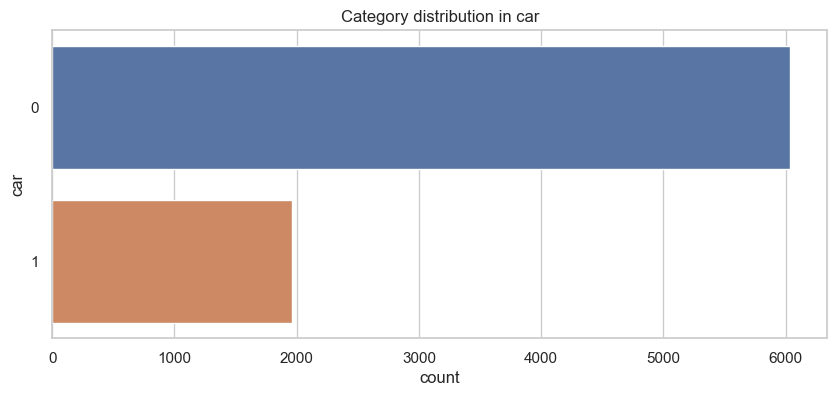

Frequency of categories for bicycle:
0    6827
1    1173
Name: bicycle, dtype: int64


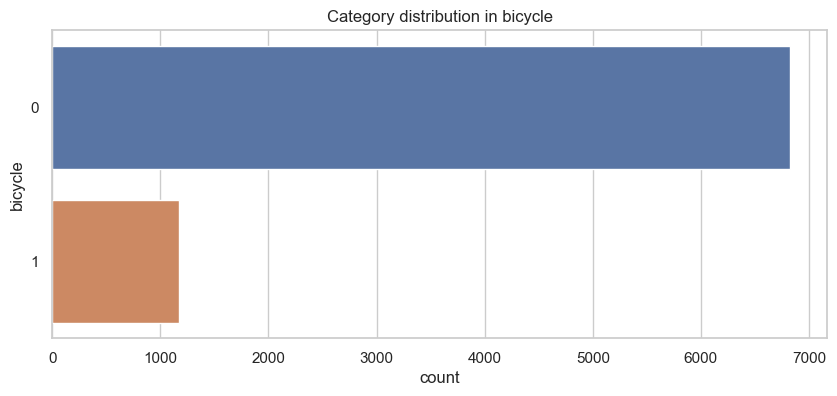

Frequency of categories for motorcycle:
0    6047
1    1953
Name: motorcycle, dtype: int64


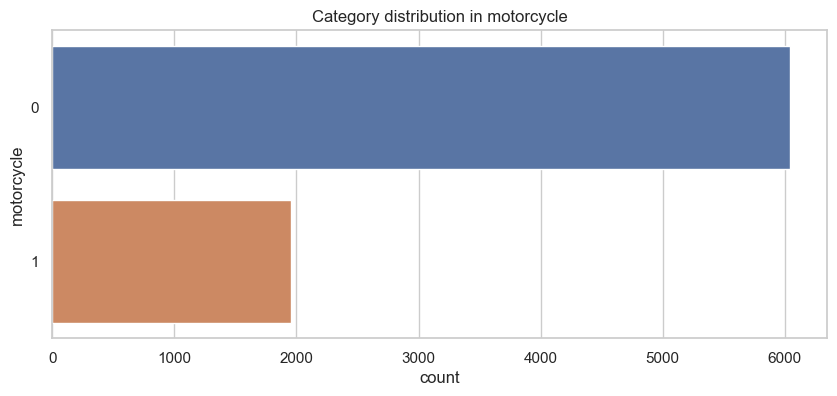

Frequency of categories for refrigerator:
1    4945
0    3055
Name: refrigerator, dtype: int64


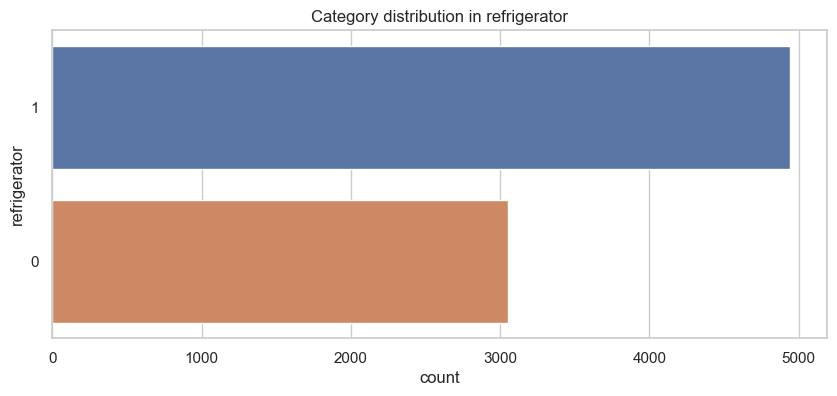

Frequency of categories for tv:
1    5579
0    2421
Name: tv, dtype: int64


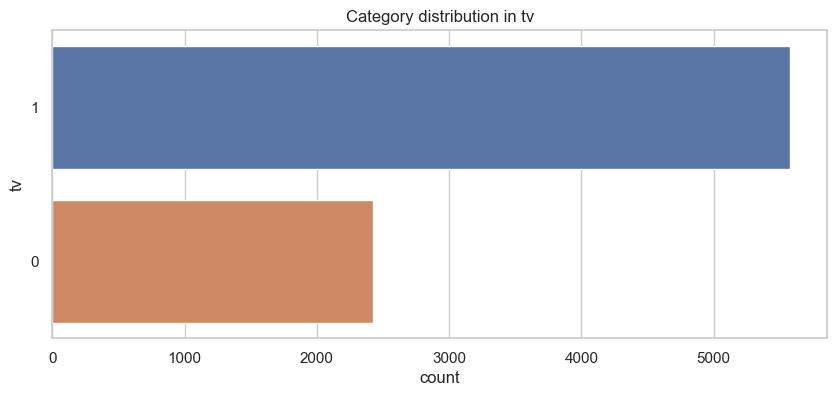

Frequency of categories for radio:
1    5381
0    2619
Name: radio, dtype: int64


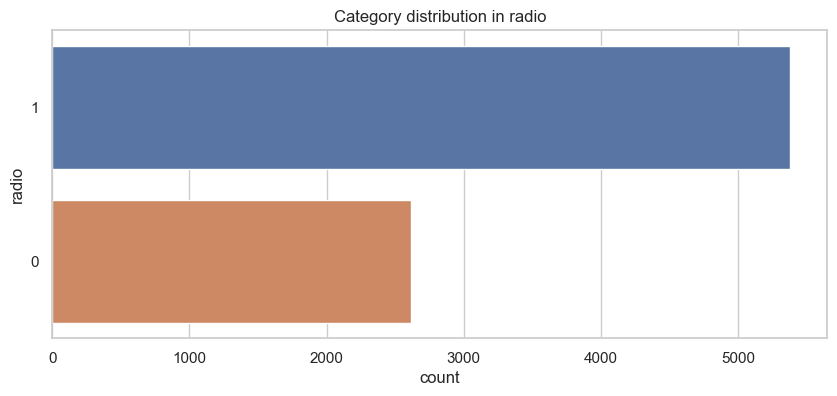

Frequency of categories for bank:
1    4597
0    3403
Name: bank, dtype: int64


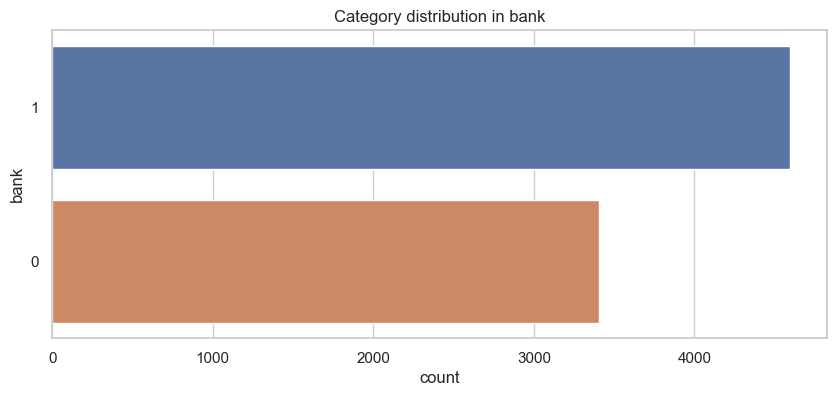

Frequency of categories for deaths_12m:
0.0    7441
1.0     391
2.0      48
3.0      18
5.0      10
4.0       8
7.0       6
Name: deaths_12m, dtype: int64


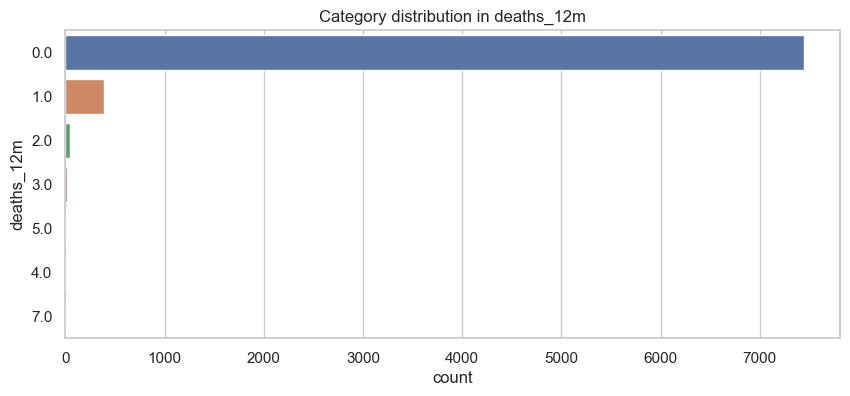

Frequency of categories for quint_nat:
5    2280
4    1858
3    1537
2    1314
1    1011
Name: quint_nat, dtype: int64


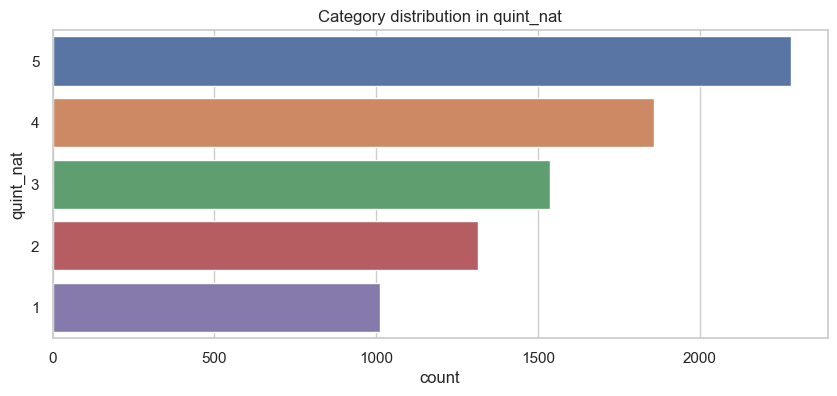

Frequency of categories for quint_urb:
5.0    1279
4.0     987
3.0     873
2.0     748
1.0     563
Name: quint_urb, dtype: int64


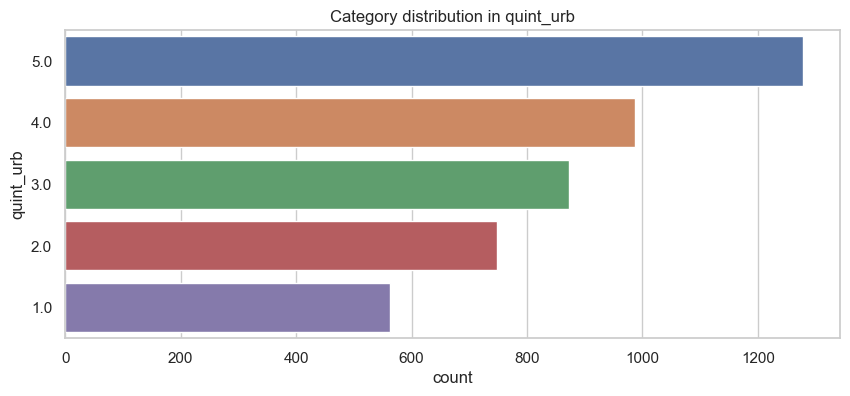

Frequency of categories for quint_rur:
5.0    1040
4.0     789
3.0     687
2.0     553
1.0     481
Name: quint_rur, dtype: int64


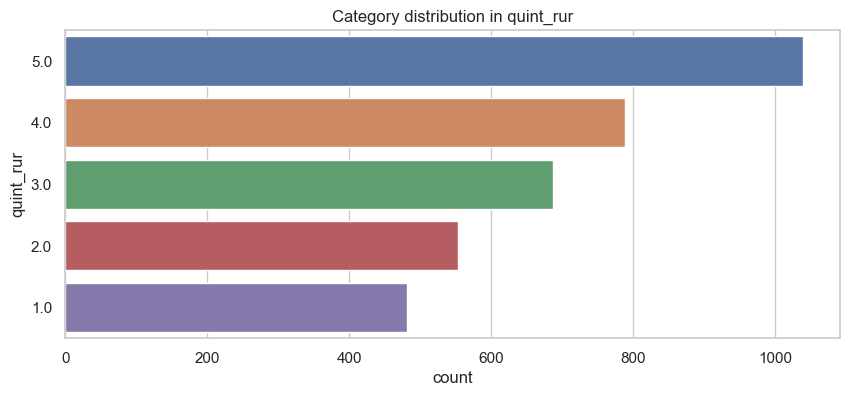

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

categorical_cols_individual = cat_ind
categorical_cols_household = cat_hld
# Examine categorical variables in the individual dataframe
for col in categorical_cols_individual:
    print(f'Frequency of categories for {col}:')
    print(df_individual[col].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df_individual, order = df_individual[col].value_counts().index)
    plt.title(f'Category distribution in {col}')
    plt.show()

# Examine categorical variables in the household dataframe
for col in categorical_cols_household:
    print(f'Frequency of categories for {col}:')
    print(df_household[col].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df_household, order = df_household[col].value_counts().index)
    plt.title(f'Category distribution in {col}')
    plt.show()

### Data Visualization

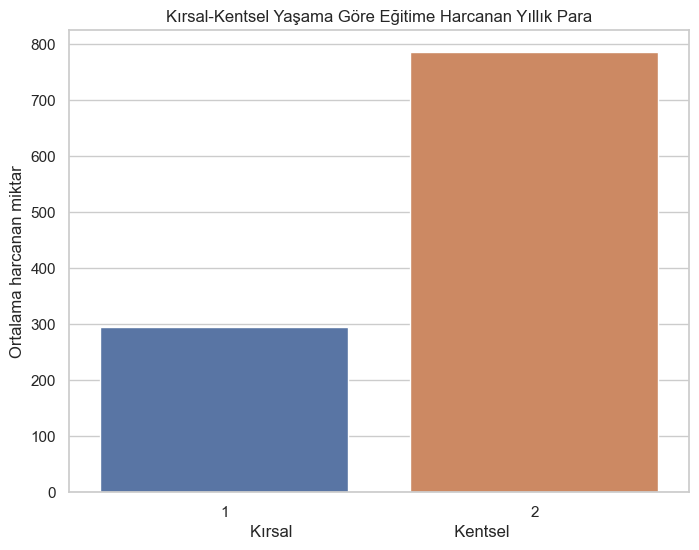

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x="urbrur", y="exp_10", data=df_household.groupby("urbrur")["exp_10"].mean().reset_index())
plt.title('Kırsal-Kentsel Yaşama Göre Eğitime Harcanan Yıllık Para')
plt.xlabel('Kırsal                                   Kentsel')
plt.ylabel('Ortalama harcanan miktar')
plt.show()

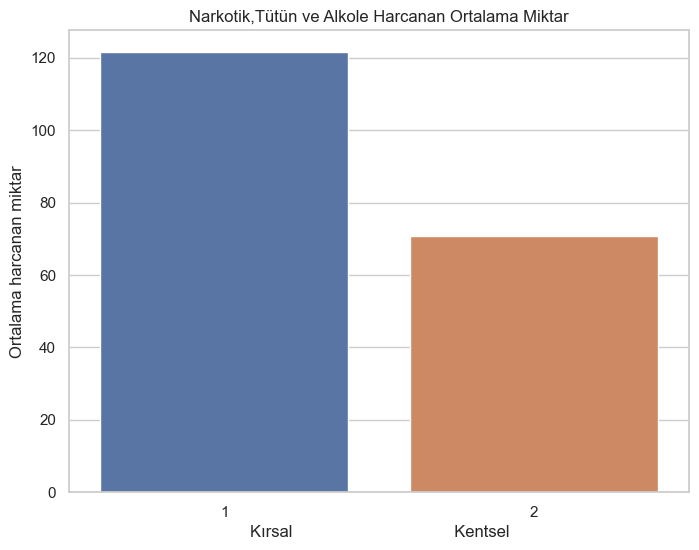

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x="urbrur", y="exp_02", data=df_household.groupby("urbrur")["exp_02"].mean().reset_index())
plt.title('Narkotik,Tütün ve Alkole Harcanan Ortalama Miktar')
plt.xlabel('Kırsal                                   Kentsel')
plt.ylabel('Ortalama harcanan miktar')
plt.show()

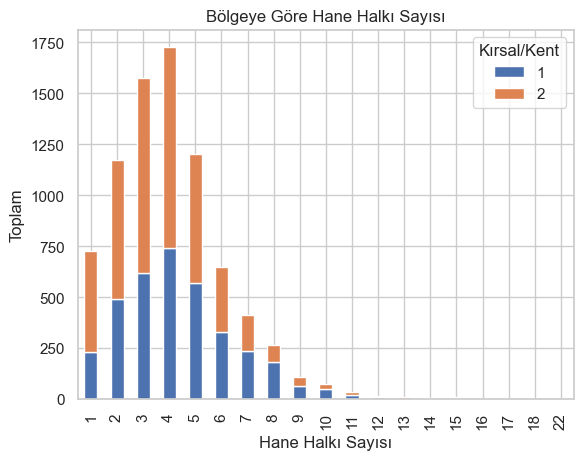

In [18]:
household_grouped = df_household.groupby(['hhsize', 'urbrur'])['urbrur'].count().unstack(fill_value=0)

household_grouped.plot(kind='bar', stacked=True)
plt.title('Bölgeye Göre Hane Halkı Sayısı')
plt.xlabel('Hane Halkı Sayısı')
plt.ylabel('Toplam')
plt.legend(title='Kırsal/Kent')
plt.show()

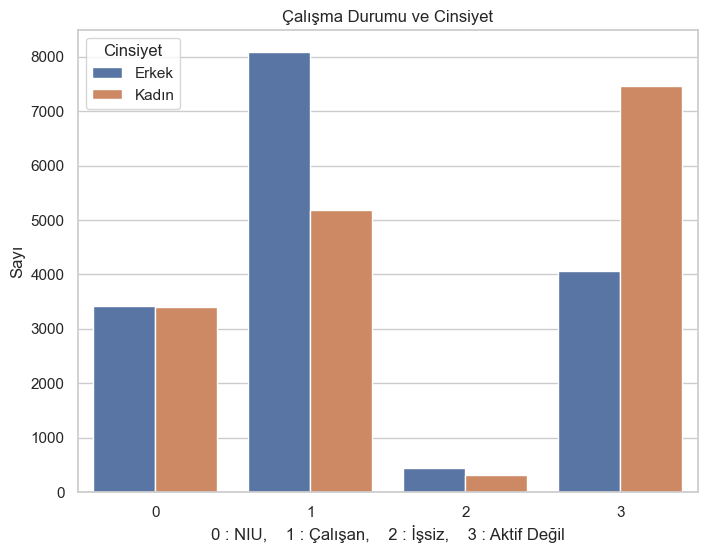

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='act_status', hue='sex', data=df_individual)
plt.title('Çalışma Durumu ve Cinsiyet')
plt.xlabel('0 : NIU,    1 : Çalışan,    2 : İşsiz,    3 : Aktif Değil')
plt.ylabel('Sayı')
plt.legend(title='Cinsiyet', labels=['Erkek', 'Kadın'])
plt.show()

### Identifying Outliers

Determining outlier in categorical data with the following method will not yield healthy results. Therefore, numeric data will be processed.


geo2             AxesSubplot(0.125,0.836742;0.133621x0.0432584)
ea            AxesSubplot(0.285345,0.836742;0.133621x0.0432584)
exp_01         AxesSubplot(0.44569,0.836742;0.133621x0.0432584)
exp_02        AxesSubplot(0.606034,0.836742;0.133621x0.0432584)
exp_03        AxesSubplot(0.766379,0.836742;0.133621x0.0432584)
exp_04           AxesSubplot(0.125,0.784831;0.133621x0.0432584)
exp_05        AxesSubplot(0.285345,0.784831;0.133621x0.0432584)
exp_06         AxesSubplot(0.44569,0.784831;0.133621x0.0432584)
exp_07        AxesSubplot(0.606034,0.784831;0.133621x0.0432584)
exp_08        AxesSubplot(0.766379,0.784831;0.133621x0.0432584)
exp_09           AxesSubplot(0.125,0.732921;0.133621x0.0432584)
exp_10        AxesSubplot(0.285345,0.732921;0.133621x0.0432584)
exp_11         AxesSubplot(0.44569,0.732921;0.133621x0.0432584)
exp_12        AxesSubplot(0.606034,0.732921;0.133621x0.0432584)
tot_exp       AxesSubplot(0.766379,0.732921;0.133621x0.0432584)
tot_food         AxesSubplot(0.125,0.681

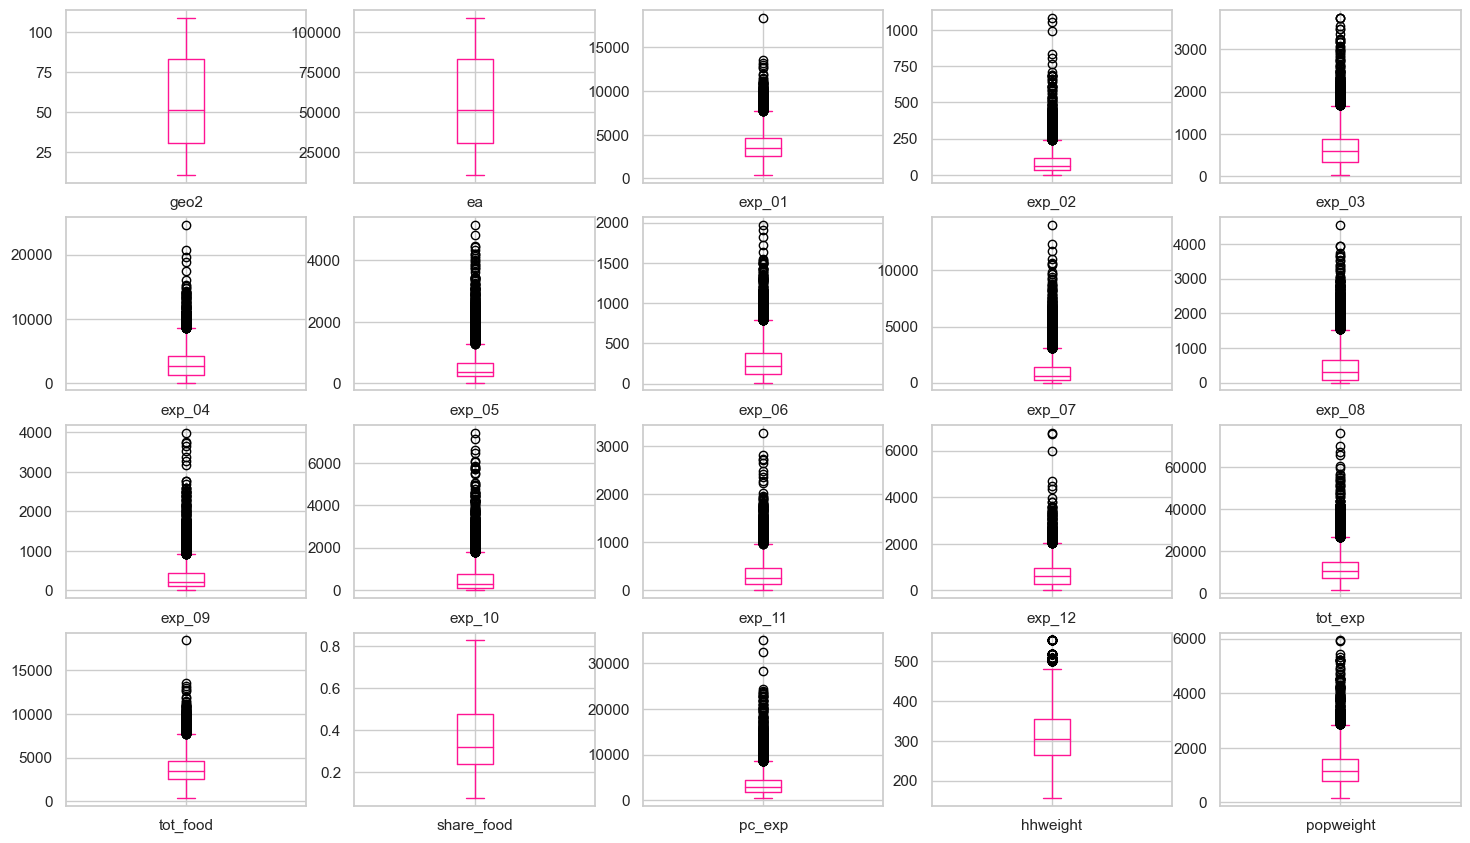

In [22]:
df_household[num_hld].plot(kind='box', subplots=True, layout=(15,5),
sharex=False,sharey=False, figsize=(18, 40),
color='deeppink')

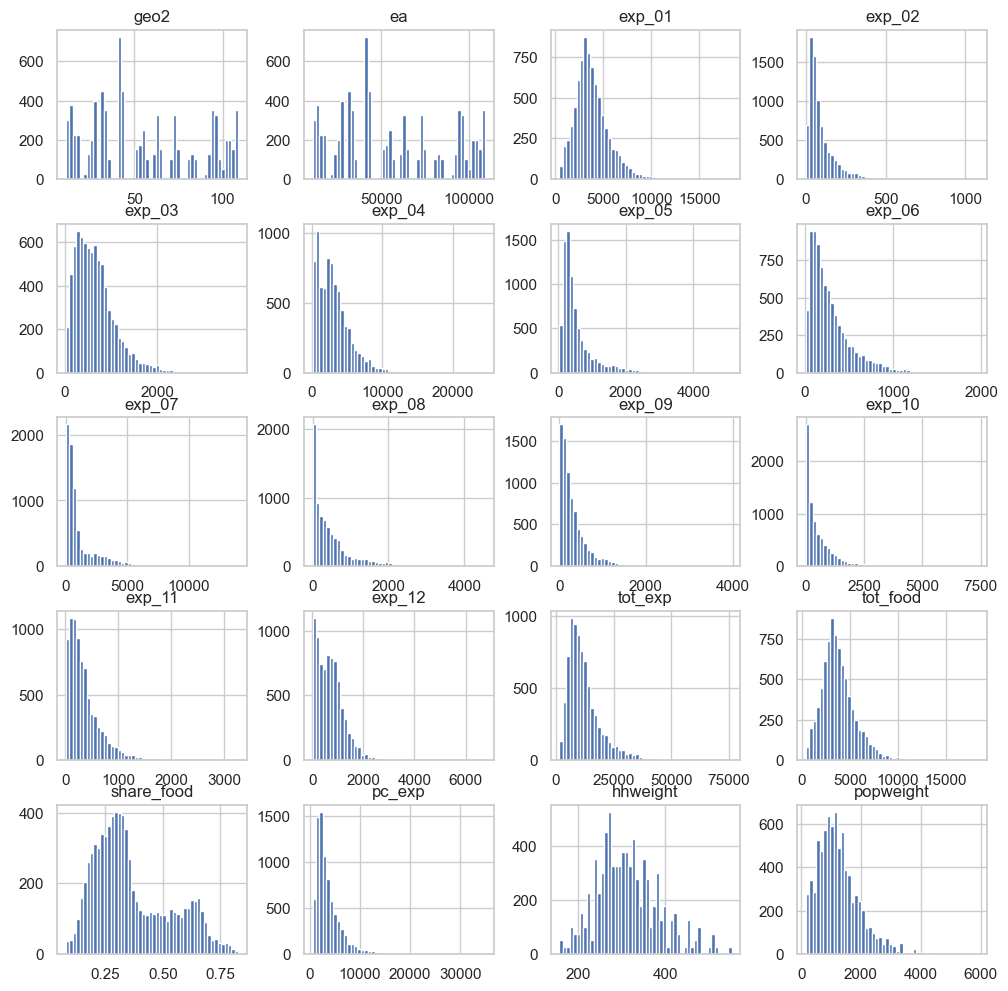

In [23]:
df_household[num_hld].hist(bins=50, figsize=(12,12))
plt.show()

The above graphs are applied for the other data set.

idno            AxesSubplot(0.125,0.836742;0.133621x0.0432584)
age          AxesSubplot(0.285345,0.836742;0.133621x0.0432584)
age_month     AxesSubplot(0.44569,0.836742;0.133621x0.0432584)
ch_weight    AxesSubplot(0.606034,0.836742;0.133621x0.0432584)
ch_height    AxesSubplot(0.766379,0.836742;0.133621x0.0432584)
hhweight        AxesSubplot(0.125,0.784831;0.133621x0.0432584)
dtype: object

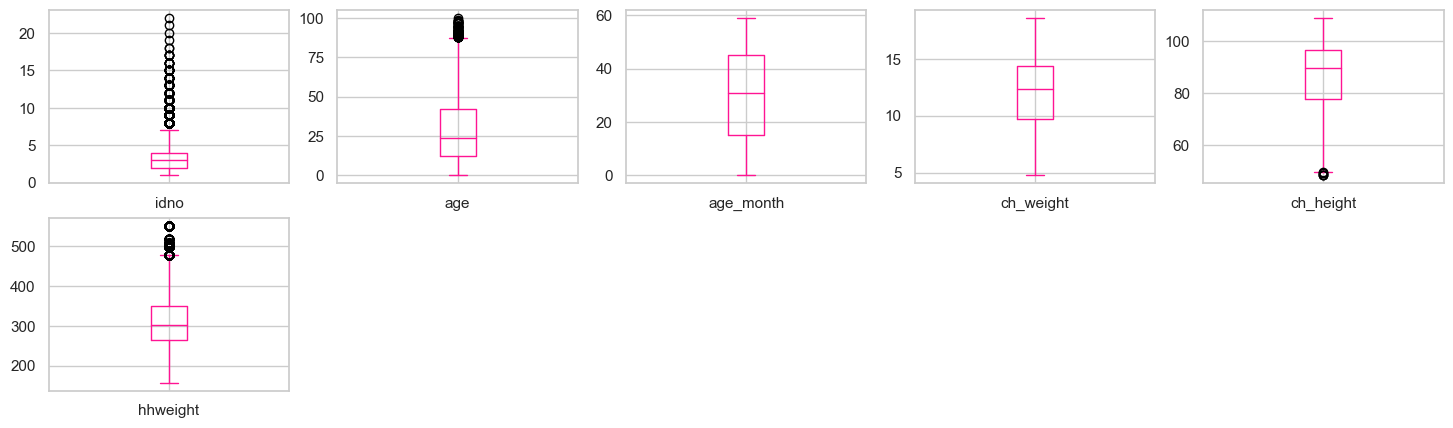

In [24]:
df_individual[num_ind].plot(kind='box', subplots=True, layout=(15,5),
sharex=False,sharey=False, figsize=(18, 40),
color='deeppink')

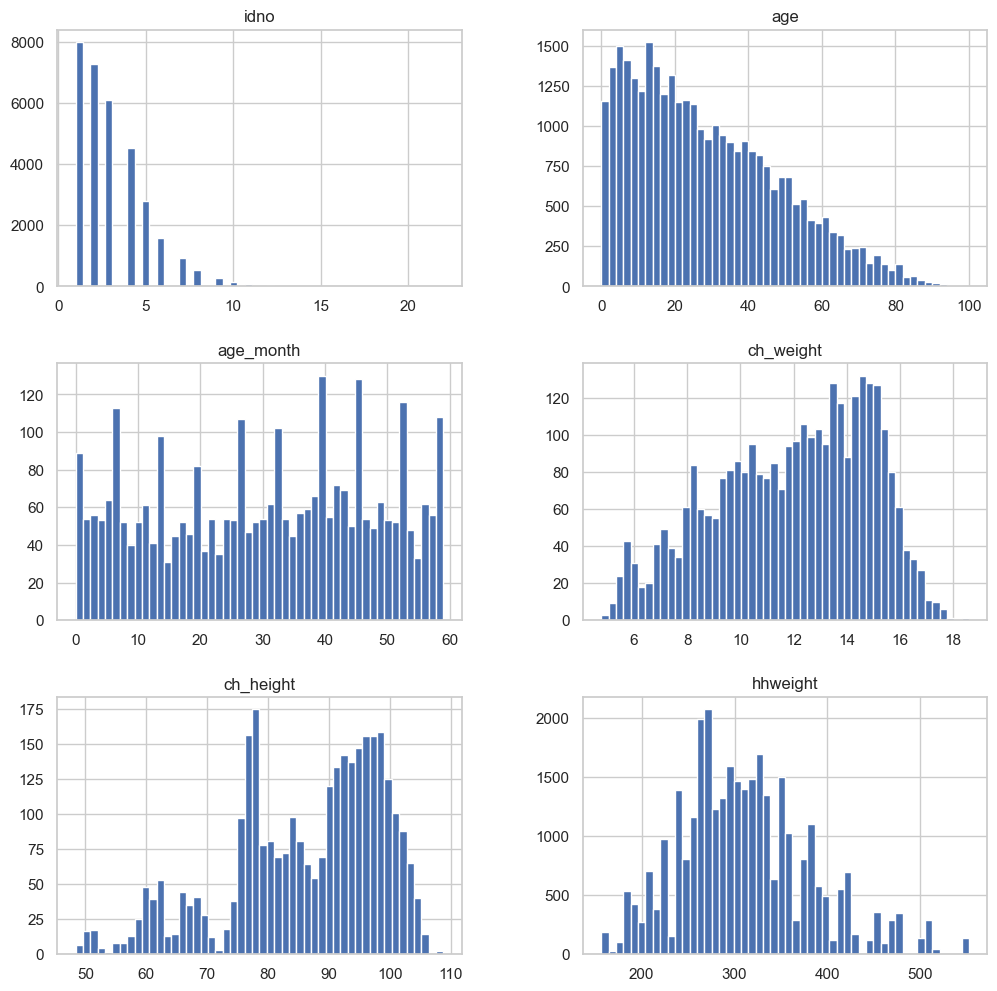

In [25]:
df_individual[num_ind].hist(bins=50, figsize=(12,12))
plt.show()

## Feature Extraction

Prepare new variables from the Individual dataset. 

* Average Age of Household Members (Ortalama Hanehalkı Yaşı): The mean age of individuals within each household.
* Average Educational Attainment (Ortalama Eğitim Seviyesi): The mean educational attainment level of household members.
* Number of Individuals with Disabilities (Engelli Birey Sayısı): The count of household members with disabilities.
* Average Births in Last 12 Months (Son 12 Ayda Ortalama Doğum Sayısı): The mean number of births in the last 12 months per household.
* Household Religious Diversity (Hanehalkı Dini Çeşitliliği): A measure of the diversity of religious affiliations within each household.

* **prop children** : Shows the ratio of children to the household population.
* **prop elder** : Shows the ratio of elderly people to the household population.
* **labor force_rate** : The ratio of the number of people in the household who can do work.
* **marital status diversity** : Marital status diversity.
* **Household Size** : Total number of people in the household.
* **Dependency Ratio** : Ratio of the number of people in need of care.
* **gender ratio** : Gender distribution.
* **industry diversity** : Industry diversity in the household.
* **years school avg** : Average years of schooling in the household.

In [26]:
# Aggregating data to create new variables at the household level

# Grouping by 'hid'
grouped_data = df_individual.groupby('hid')

gender_counts = df_individual.groupby(['hid', 'sex'])['sex'].count().unstack(fill_value=0)
working_age = df_individual[(df_individual['age'] >= 15) & (df_individual['age'] <= 64)]
dependents = df_individual[(df_individual['age'] < 15) | (df_individual['age'] > 64)]


# Creating the new variables
new_variables = {
    'Average Age': grouped_data['age'].mean(),
    'Average Education Level': grouped_data['educ_attain'].mean(),
    'Number of Disabled Individuals': grouped_data['disability'].sum(),
    'Average Births Last 12 Months': grouped_data['births_12m'].mean(),
    'Religious Diversity': grouped_data['religion'].nunique(),

    'prop children' : df_individual[df_individual['age'] <= 14].groupby('hid')['age'].count() / df_individual.groupby('hid')['age'].count(),
    'prop elder' : df_individual[df_individual['age'] >= 65].groupby('hid')['age'].count() / df_individual.groupby('hid')['age'].count(),
    'labor force_rate' : df_individual[df_individual['labor_force'] == 1].groupby('hid')['labor_force'].count() / df_individual.groupby('hid')['age'].count(),
    'marital status diversity' : df_individual.groupby('hid')['marstat'].nunique(),
    'Dependency Ratio' : dependents.groupby('hid')['idno'].count() / (working_age.groupby('hid')['idno'].count() + dependents.groupby('hid')['idno'].count()),
    'gender ratio' : gender_counts[1] / (gender_counts[1]+gender_counts[2]),    # Adding a small number to avoid division by zero
    'industry diversity' : df_individual.groupby('hid')['industry'].nunique(),
    'years school avg' : df_individual.groupby('hid')['yrs_school'].mean()

}

# Converting the new variables into a DataFrame
new_variables_df = pd.DataFrame(new_variables)


# Displaying the first few rows of the new variables
new_variables_df.reset_index(inplace = True)
new_variables_df.fillna(0, inplace=True)
new_variables_df

,hid,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity,prop children,prop elder,labor force_rate,marital status diversity,Dependency Ratio,gender ratio,industry diversity,years school avg
0,00076fe9d44,19.000000,0.800000,1,0.0,1,0.600000,0.000000,0.200000,2,0.600000,0.200000,2,1.750000
1,001732acf20,50.000000,0.000000,0,0.0,1,0.000000,0.000000,1.000000,1,0.000000,1.000000,1,0.000000
2,0025c7eb6b0,27.000000,2.333333,0,0.0,1,0.000000,0.000000,0.000000,2,0.000000,0.333333,1,10.333333
3,0025c83c02c,18.250000,0.750000,0,0.0,1,0.500000,0.000000,0.250000,2,0.500000,0.750000,2,2.000000
4,002a356ac9f,24.800000,1.600000,1,0.0,1,0.400000,0.000000,0.400000,2,0.400000,0.400000,3,5.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,ffdf35cd744,22.333333,0.666667,0,0.0,1,0.333333,0.000000,0.333333,2,0.333333,0.333333,1,1.500000
7996,ffdfe160ab5,32.888889,1.000000,0,0.0,1,0.111111,0.222222,0.555556,2,0.333333,0.666667,2,1.125000
7997,ffe1892f851,15.875000,1.375000,0,0.5,1,0.625000,0.000000,0.125000,2,0.625000,0.625000,2,5.142857
7998,fff47529494,16.000000,1.500000,0,0.0,1,0.250000,0.000000,0.750000,2,0.250000,0.500000,2,9.666667


In [27]:
model_data = pd.merge(df_household, new_variables_df, on = 'hid', how = 'left')
model_data

,hid,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,...,Average Births Last 12 Months,Religious Diversity,prop children,prop elder,labor force_rate,marital status diversity,Dependency Ratio,gender ratio,industry diversity,years school avg
0,00a191396a2,1,11,11066,2,1,1,1,1,2,...,0.0,1,0.0,0.000000,1.00,1,0.000000,1.000000,1,15.0
1,0111c7fa67c,1,11,11066,2,1,2,1,0,2,...,0.0,1,0.0,0.000000,0.00,1,0.000000,0.000000,1,0.0
2,01410d9c60d,1,11,11087,2,2,1,4,1,2,...,0.0,1,0.0,0.000000,0.50,2,0.000000,0.500000,2,7.5
3,015ff82b55c,1,11,11094,2,2,1,1,1,2,...,0.0,2,0.0,0.000000,1.00,1,0.000000,0.500000,2,0.0
4,01c39d3df0d,1,11,11094,2,1,2,3,2,6,...,0.0,1,0.0,0.000000,1.00,1,0.000000,1.000000,1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,dbeabfbf152,10,109,109046,2,4,2,2,1,1,...,0.0,1,0.5,0.000000,0.25,2,0.500000,0.250000,2,3.0
7996,e31748e1596,10,109,109040,2,2,1,5,2,2,...,0.0,1,0.0,0.000000,1.00,2,0.000000,0.500000,2,12.0
7997,eba931cf345,10,109,109046,2,5,1,4,3,2,...,0.0,1,0.0,0.000000,0.80,3,0.000000,0.400000,3,1.8
7998,f927f4e982d,10,109,109040,2,3,1,4,1,2,...,0.0,1,0.0,0.666667,0.00,2,0.666667,0.333333,1,3.0


#### Model Data Exploration

In [28]:
model_data.describe()

,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,walls,...,Average Births Last 12 Months,Religious Diversity,prop children,prop elder,labor force_rate,marital status diversity,Dependency Ratio,gender ratio,industry diversity,years school avg
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5.181250,55.675000,55737.375000,1.556250,4.049500,1.325625,2.812750,1.682250,2.413000,3.324500,...,0.050265,1.062500,0.253478,0.091800,0.464990,1.867375,0.296403,0.491075,2.071500,4.872963
std,3.034106,30.726615,30722.827585,0.496857,2.135034,0.646255,1.650614,0.892824,1.671161,1.169346,...,0.204064,0.246681,0.230842,0.237554,0.297101,0.532279,0.235477,0.234790,0.812693,4.167258
min,1.000000,11.000000,11003.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,31.000000,31071.750000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.250000,2.000000,0.000000,0.333333,2.000000,1.285714
50%,5.000000,51.500000,51511.500000,2.000000,4.000000,1.000000,3.000000,2.000000,2.000000,3.000000,...,0.000000,1.000000,0.250000,0.000000,0.444444,2.000000,0.333333,0.500000,2.000000,4.200000
75%,8.000000,83.000000,83095.250000,2.000000,5.000000,1.000000,4.000000,2.000000,2.000000,3.000000,...,0.000000,1.000000,0.500000,0.000000,0.666667,2.000000,0.500000,0.666667,2.000000,7.666667
max,10.000000,109.000000,109046.000000,2.000000,22.000000,3.000000,20.000000,13.000000,6.000000,8.000000,...,1.000000,3.000000,0.900000,1.000000,1.000000,4.000000,0.900000,1.000000,10.000000,18.000000


In [29]:
missing_values_table(model_data,True)

            n_miss  ratio
quint_rur     4450  55.62
quint_urb     3550  44.38
deaths_12m      78   0.98


## Modeling & Model Performances

Data Preprocessing Steps;
 * Remove ID and Geo Columns
 * Handle missing values etc.
 * Handle categoric variables etc.
 * Handle numeric variables etc.
 * Split Train/Test (70/30)

Model Selection
 * Since it's a classification problem you can use several classification algorithms such as  Random Forest, and Gradient Boosting etc. And compare their performances.

Model Training and Evaluation
 * Train each model on the training set. Evaluate their performance using metrics like accuracy, precision, recall, and F1-score. Create a confusion matrix for each model.



Please remember, it's important for us to add your comments about each model performances.

### 1) Modeling

In [32]:
# Change target column definitian for a binary classification problems

# 1=Rural ,  Urban=2

model_data['urbrur'] = model_data['urbrur'].replace({2:0 , 1:1})

To avoid **Data Leakage** problem, we should do train-test split before preprocessing. Thus, our test data will not miss information from our train data during preprocessing.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
data = model_data

# Removing the ID and geo columns
# Since quint_rur and quint_urb columns are too correlated with our target we did also remove these features
data.drop(['hid','geo1','geo2', 'quint_rur','quint_urb'], axis=1, inplace=True)


# If we had not removed these two features(quint_rur, quint_urb), what would have encountered in the model results?


# Identifying categorical and numerical columns


# Handling missing values for numerical columns


# Encoding categorical variables


# Handling numerical variables


# Splitting the dataset into features (X) and target variable (y)
X = data.drop('urbrur', axis=1)
y = data['urbrur']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1773)

* There is no missing in our target data. In Data X, there is a small amount of missing in the **deaths_12** column, it will be filled with **knn imputer**.

In [42]:
X_train.isnull().sum()

ea                                 0
hhsize                             0
statocc                            0
rooms                              0
bedrooms                           0
floor                              0
walls                              0
roof                               0
water                              0
piped_water                        0
toilet                             0
flush_toilet                       0
electricity                        0
cook_fuel                          0
phone                              0
cell                               0
car                                0
bicycle                            0
motorcycle                         0
refrigerator                       0
tv                                 0
radio                              0
bank                               0
deaths_12m                        60
exp_01                             0
exp_02                             0
exp_03                             0
e

In [43]:
X_test.isnull().sum()

ea                                 0
hhsize                             0
statocc                            0
rooms                              0
bedrooms                           0
floor                              0
walls                              0
roof                               0
water                              0
piped_water                        0
toilet                             0
flush_toilet                       0
electricity                        0
cook_fuel                          0
phone                              0
cell                               0
car                                0
bicycle                            0
motorcycle                         0
refrigerator                       0
tv                                 0
radio                              0
bank                               0
deaths_12m                        18
exp_01                             0
exp_02                             0
exp_03                             0
e

In [44]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  

columns_to_impute = ['deaths_12m']

X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])

print(X_train[columns_to_impute].count())

deaths_12m    6000
dtype: int64


###  Random Classifier!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier için parametre gridini tanımla
param_grid = {
    'n_estimators': [100, 200, 300],  # Denenecek ağaç sayıları
    'max_features': ['auto', 'sqrt'],  # Maksimum özellik sayısı
    'max_depth': [10, 20, None],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Minimum örnek sayısı bölünme için
    'min_samples_leaf': [1, 2, 4]  # Minimum örnek sayısı yaprak düğümde
}

# RandomForestClassifier modelini oluştur
rf = RandomForestClassifier(random_state=42)

# GridSearchCV modelini oluştur
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# GridSearchCV modelini eğitim verisiyle eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdır
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Skor:", grid_search.best_score_)

In [46]:
# Test seti üzerinde tahmin yapma
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
# Doğruluk skorunu hesaplama
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train,y_train_pred)
print("Test Score:", accuracy_test)
print("Train Score:",accuracy_train)

Test Doğruluğu: 0.9015
Train doğruluğu: 0.9991666666666666


* **Grid search** results seem to be Over-Fit. Train score is very high and the difference between the test results has widened. By using **Validation Curve**, we will better observe the parameter effects and prevent Over-Fit.
* The reason why we do validation split here is to enable the model to generalize better.

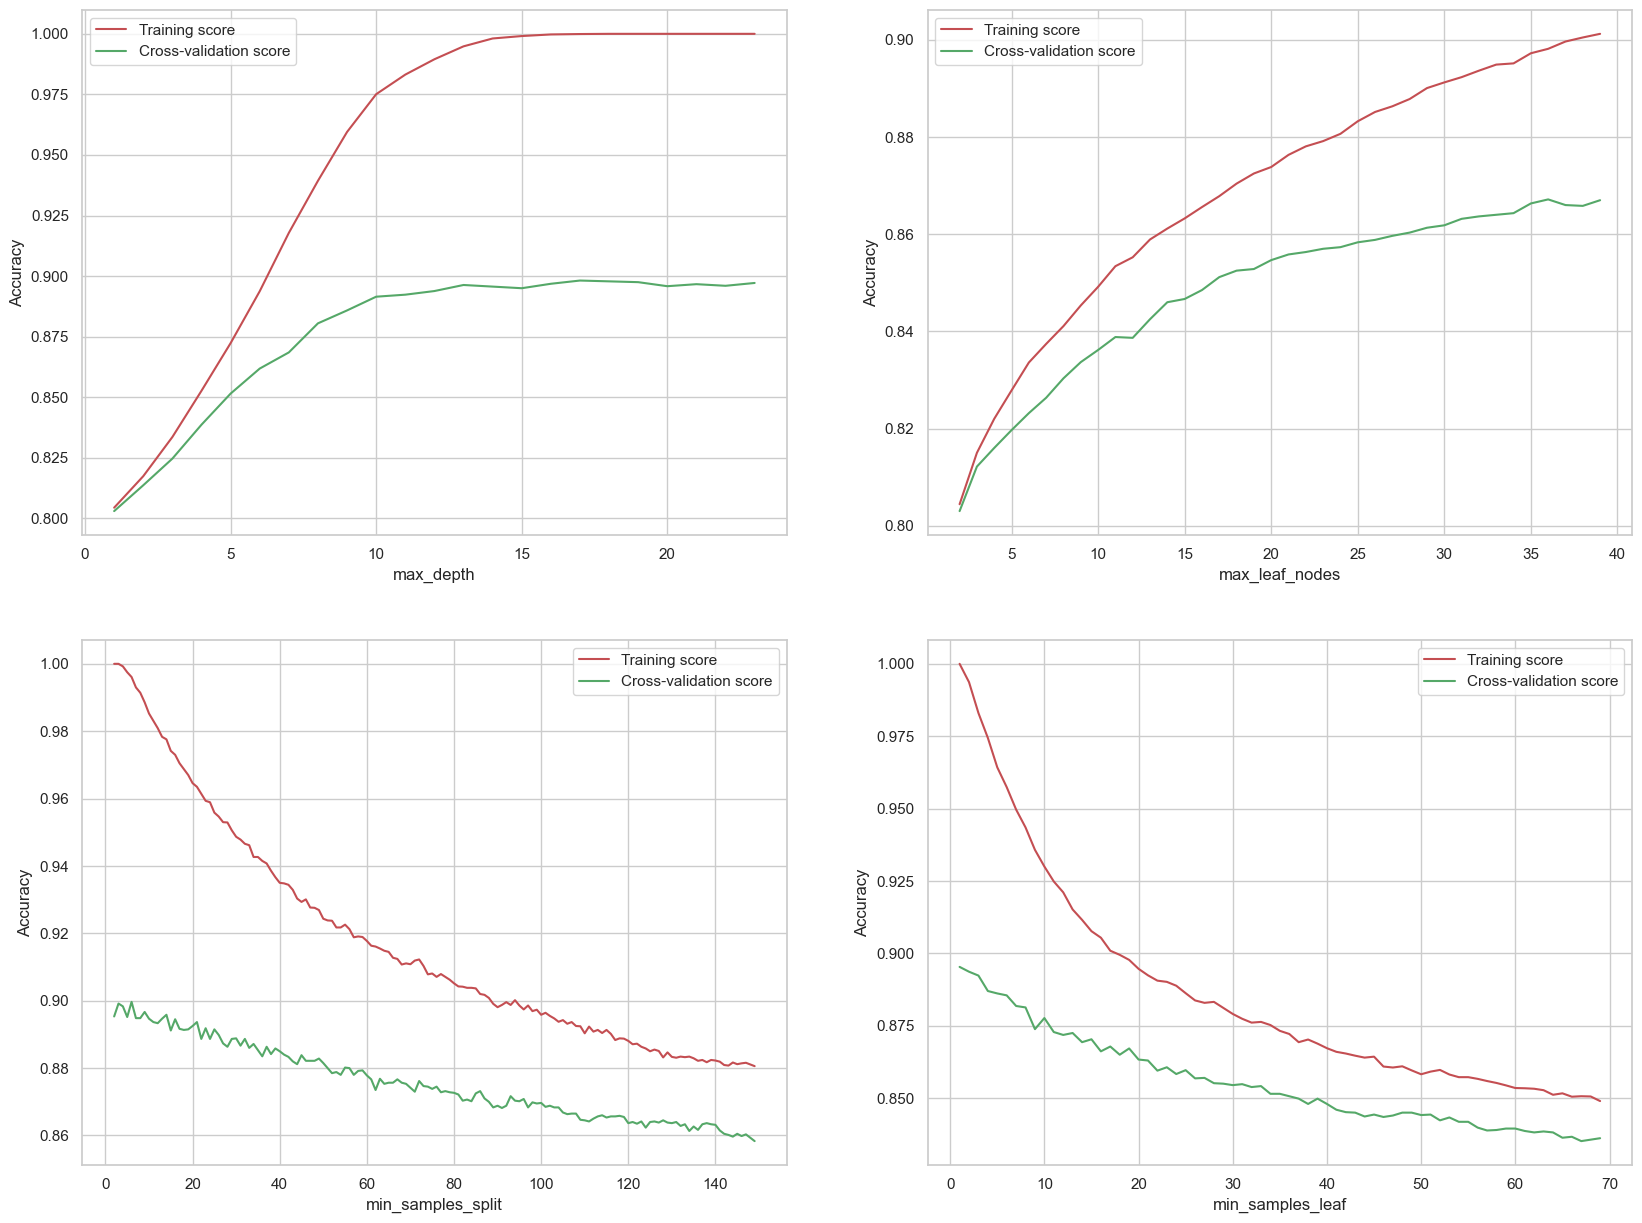

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# RandomForestClassifier modeli
rf_classifier = RandomForestClassifier(random_state=1773)

# Parametre adları ve aralıkları
param_names = ["max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf"]
param_ranges = [list(range(1, 24)), list(range(2, 40)), list(range(2, 150)), list(range(1, 70))]

# Create figure space
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, ax in enumerate(axes.reshape(-1), 0):
    # Validation curve hesaplama
    train_scores, test_scores = validation_curve(
        rf_classifier, X_train, y_train,
        param_name=param_names[i], param_range=param_ranges[i],
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=1773),
        scoring="accuracy", n_jobs=-1
    )

    # Skorların ortalamasını alma
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot
    ax.plot(param_ranges[i], train_scores_mean, label="Training score", color="r")
    ax.plot(param_ranges[i], test_scores_mean, label="Cross-validation score", color="g")
    ax.set_xlabel(param_names[i])
    ax.set_ylabel("Accuracy")
    ax.legend()

plt.show()

Best parameters:
* **max_depth**:8
* **max_leaf_nodes**:9
* **min_sample_split**:55
* **min_sample_leaf**:36
* **n_estimators**:100, Let's train our model with the new parameters.

In [48]:
# En iyi parametreler
best_params = {
    'max_depth': 10,
    'max_leaf_nodes': 35,
    'min_samples_split': 44,
    'min_samples_leaf': 20,
    'n_estimators': 200
}

# En iyi parametrelerle RandomForestClassifier modelini oluşturma
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_leaf_nodes=best_params['max_leaf_nodes'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=1773
)

# Modeli eğitim verileri üzerinde eğitme
rf_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_leaf_nodes=35, min_samples_leaf=20,
                       min_samples_split=44, n_estimators=200,
                       random_state=1773)

In [49]:
# Test seti üzerinde tahmin yapma
y_test_pred = rf_best.predict(X_test)
y_train_pred = rf_best.predict(X_train)
# Doğruluk skorunu hesaplama
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train,y_train_pred)
print("Test Score:", accuracy_test)
print("Train Score:",accuracy_train)


Test Doğruluğu: 0.856
Train doğruluğu: 0.8815



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1112
           1       0.87      0.79      0.83       888

    accuracy                           0.86      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.86      0.86      2000



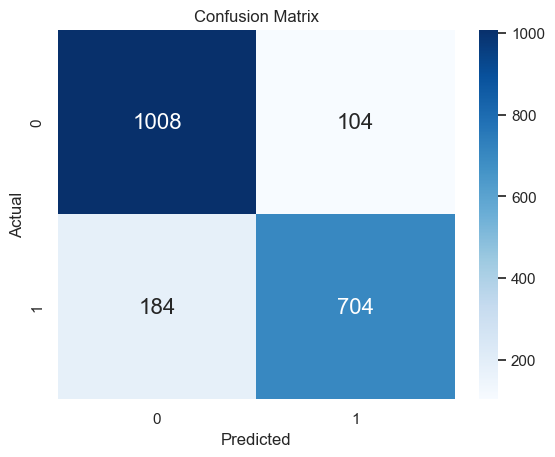

In [50]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
df_features = pd.DataFrame(rf_best.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features.rename(columns = {'index':'Variable'}, inplace = True)
df_features

,Variable,Importance
0,cook_fuel,0.154790
1,share_food,0.130076
2,toilet,0.084752
3,exp_04,0.065067
4,exp_08,0.063594
5,ea,0.059517
6,exp_12,0.048091
7,water,0.045331
8,exp_06,0.045224
9,bank,0.034015


**Model Yorumlama**
* Öncelikle modelimizde çalışacak en iyi parametreleri belirlemek için **Grid Search** kullandık. Aldığımız sonuçlarda **Train Skoru**:0.9984, **Test Skoru**:0.9070 olarak bulundu. Görünen o ki, model Over-Fit olmuş ve genelleştirilip kullanmaya pek uygun görünmüyor.
* Bu problemi ortadan kaldırabilmek için **Validation curve** yöntemini kullanıp, validation split uygulanan verimizden oluşturulan grafiklerden en uygun parametre değerlerini seçtik.
* Yeni seçilen parametreler kullanıldığında, **Train Skoru**:0.8766, **Test Skoru**:0.8680 oldu. Skorlar biraz düştü fakat Over-Fitting probleminden kurtulmuş olduk.
**Confusion Matrix Yorumlama**
* **Precision:**               
  0 değeri için modelin tahminlerinin %84'inin gerçekten 0 değerinde olduğunu söylerken, 1 değeri için bu oran %86'dır.
* **Recall:**  
  Gerçekten pozitif olan örneklerin model tarafından doğru bir şekilde pozitif olarak sınıflandırılma oranını gösterir. 0 değeri için bu oran %90, 1 değeri için ise %78'dir.
* **F1-Score:**
  Precision ve duyarlılığın harmonik ortalamasıdır. Modelin genel performansını ifade eder. 0 değeri için bu oran %87, 1 değeri için ise %82'dir.   

**Model Interpretation**
* First of all, we used **Grid Search** to determine the best parameters to work in our model. The results we got were **Train Score**:0.9984 and **Test Score**:0.9070. It seems that the model is Over-Fit and not very suitable for generalization and use.
* In order to eliminate this problem, we used the **Validation curve** method and selected the most appropriate parameter values from the graphs generated from our validation split data.
* Using the newly selected parameters, **Train Score**:0.8766, **Test Score**:0.8680. The scores dropped a little but we got rid of the Over-Fitting problem.
* **Confusion Matrix Interpretation**
* **Precision:**               
  For a value of 0, 84% of the model's predictions are indeed 0, while for a value of 1, this percentage is 86%.
*  **Recall:**  
  Indicates the proportion of truly positive samples that are correctly classified as positive by the model. For a value of 0, this proportion is 90%, while for a value of 1 it is 78%.
* **F1-Score:**
  It is the harmonic mean of precision and sensitivity. For a value of 0, this rate is 87% and for a value of 1 it is 82%. 

###  Cat Boost Classifier

0:	learn: 0.6110693	total: 7.76ms	remaining: 769ms
1:	learn: 0.5420135	total: 14.4ms	remaining: 707ms
2:	learn: 0.4942697	total: 33.1ms	remaining: 1.07s
3:	learn: 0.4593774	total: 39ms	remaining: 937ms
4:	learn: 0.4263709	total: 44.4ms	remaining: 843ms
5:	learn: 0.4053148	total: 48.9ms	remaining: 767ms
6:	learn: 0.3865539	total: 53.2ms	remaining: 707ms
7:	learn: 0.3711753	total: 57.2ms	remaining: 658ms
8:	learn: 0.3594748	total: 61ms	remaining: 617ms
9:	learn: 0.3489478	total: 65.3ms	remaining: 588ms
10:	learn: 0.3314237	total: 69.5ms	remaining: 562ms
11:	learn: 0.3213832	total: 73.6ms	remaining: 540ms
12:	learn: 0.3121420	total: 77.8ms	remaining: 521ms
13:	learn: 0.3055764	total: 81.8ms	remaining: 503ms
14:	learn: 0.2990509	total: 86.1ms	remaining: 488ms
15:	learn: 0.2920063	total: 90.5ms	remaining: 475ms
16:	learn: 0.2854056	total: 94.4ms	remaining: 461ms
17:	learn: 0.2789532	total: 98.3ms	remaining: 448ms
18:	learn: 0.2660259	total: 102ms	remaining: 436ms
19:	learn: 0.2591668	total:

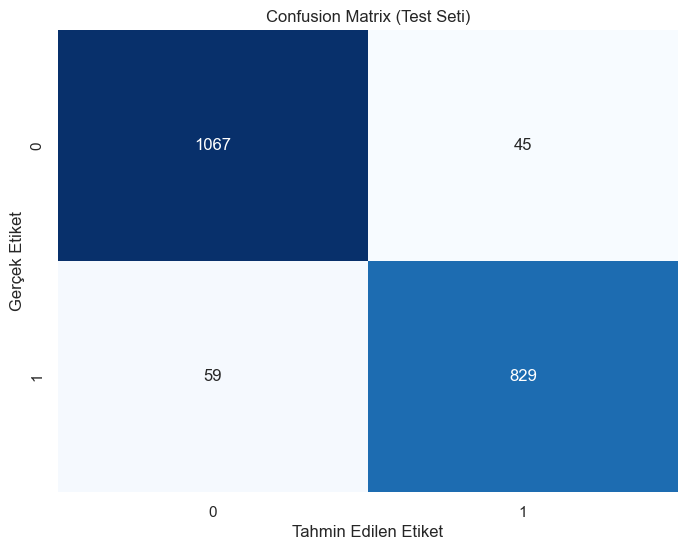

Eğitim Seti Doğruluk Skoru: 0.99
Test Seti Doğruluk Skoru: 0.95

Classification Report (Test Seti):
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1112
           1       0.95      0.93      0.94       888

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [55]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=7, random_seed=42)

# Modeli eğitelim
catboost_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_test_pred = catboost_classifier.predict(X_test)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix (Test Seti):\n', conf_matrix_test)

# Heatmap ile Confusion Matrix görselleştirmesi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Seti)')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# Diğer metrikleri ekrana yazdır
train_accuracy = accuracy_score(y_train, catboost_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print(f'Eğitim Seti Doğruluk Skoru: {train_accuracy:.2f}')
print(f'Test Seti Doğruluk Skoru: {test_accuracy:.2f}')
print('\nClassification Report (Test Seti):\n', class_report_test)

* The results of the model seem to be quite successful. Let's examine the importance of the columns (feature importances).

In [56]:
df_features = pd.DataFrame(catboost_classifier.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features.rename(columns = {'index':'Variable'}, inplace = True)
df_features

,Variable,Importance
0,ea,36.833771
1,hhweight,10.982065
2,share_food,5.459782
3,exp_06,3.824658
4,cook_fuel,3.705192
5,exp_07,3.473112
6,exp_09,3.256379
7,exp_04,2.109276
8,exp_11,2.101805
9,statocc,1.897720


* The **'ea'** and **'hhweight'** columns seem to have a lot of say in the cat boost model. In order to see the difference, we will remove these two columns and run the model again.

0:	learn: 0.6223419	total: 12ms	remaining: 1.19s
1:	learn: 0.5688458	total: 21.9ms	remaining: 1.07s
2:	learn: 0.5299608	total: 29ms	remaining: 938ms
3:	learn: 0.4987929	total: 36.3ms	remaining: 870ms
4:	learn: 0.4672374	total: 48.9ms	remaining: 929ms
5:	learn: 0.4432357	total: 53.4ms	remaining: 836ms
6:	learn: 0.4261599	total: 57.8ms	remaining: 768ms
7:	learn: 0.4111003	total: 62.4ms	remaining: 717ms
8:	learn: 0.3975277	total: 66.6ms	remaining: 673ms
9:	learn: 0.3875605	total: 71ms	remaining: 639ms
10:	learn: 0.3790485	total: 76.1ms	remaining: 616ms
11:	learn: 0.3695147	total: 80.3ms	remaining: 589ms
12:	learn: 0.3625706	total: 84.6ms	remaining: 566ms
13:	learn: 0.3556418	total: 88.7ms	remaining: 545ms
14:	learn: 0.3511526	total: 92.9ms	remaining: 526ms
15:	learn: 0.3451842	total: 96.9ms	remaining: 509ms
16:	learn: 0.3381162	total: 101ms	remaining: 492ms
17:	learn: 0.3315156	total: 105ms	remaining: 479ms
18:	learn: 0.3265658	total: 110ms	remaining: 468ms
19:	learn: 0.3218494	total: 114

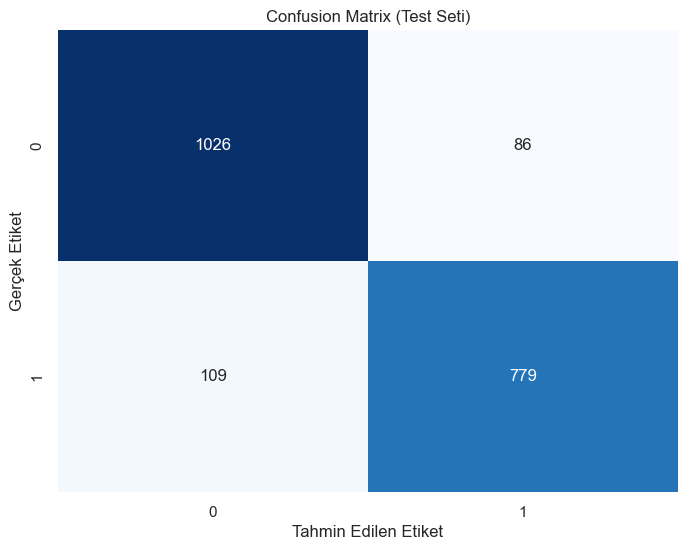

Eğitim Seti Doğruluk Skoru: 0.97
Test Seti Doğruluk Skoru: 0.90

Classification Report (Test Seti):
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1112
           1       0.90      0.88      0.89       888

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [57]:
X_train_dropped=X_train.drop(columns=['ea','hhweight'])
X_test_dropped=X_test.drop(columns=['ea','hhweight'])

catboost_classifier1 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=7, random_seed=42)

# Modeli eğitelim
catboost_classifier1.fit(X_train_dropped, y_train)

# Test seti üzerinde tahmin yapalım
y_test_pred = catboost_classifier1.predict(X_test_dropped)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix (Test Seti):\n', conf_matrix_test)

# Heatmap ile Confusion Matrix görselleştirmesi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Seti)')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# Diğer metrikleri ekrana yazdır
train_accuracy = accuracy_score(y_train, catboost_classifier1.predict(X_train_dropped))
test_accuracy = accuracy_score(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print(f'Eğitim Seti Doğruluk Skoru: {train_accuracy:.2f}')
print(f'Test Seti Doğruluk Skoru: {test_accuracy:.2f}')
print('\nClassification Report (Test Seti):\n', class_report_test)

In [58]:
df_features = pd.DataFrame(catboost_classifier1.feature_importances_, columns = ['Importance'],
             index = X_train_dropped.columns).sort_values('Importance', ascending = False).reset_index()
df_features.rename(columns = {'index':'Variable'}, inplace = True)
df_features

,Variable,Importance
0,exp_09,10.027351
1,exp_07,8.347067
2,exp_06,8.312588
3,cook_fuel,6.220334
4,share_food,5.398762
5,rooms,4.340808
6,exp_04,4.226336
7,exp_11,4.024151
8,water,3.348661
9,statocc,3.191089


* The columns we extracted are quite dominant on the prediction, but our model works efficiently even without them.